## Intro to using beautiful soup to scrape web football data

### Install Beautiful Soup

In [ ]:
# pip install beautifulsoup4


## We will now want to import all the necessary packages require for scraping and analysis:

In [2]:
import requests
import json
from mobfot import MobFot

import pandas as pd
from bs4 import BeautifulSoup
# import klib as kb
import seaborn as sb
import matplotlib.pyplot as plt
# import wes
import matplotlib as mpl
import warnings
import numpy as np
from math import pi
from urllib.request import urlopen
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
from sklearn.preprocessing import StandardScaler


In [3]:
EPL_Player_db = pd.read_csv('CSVs/EPL_Player_Database.csv')

In [4]:
position = 'Central Midfielders'
pl_starts = 10
max_age = 32

subset_of_data = EPL_Player_db.query('position_group == @position & Starts > @pl_starts & Age < @max_age' )
players_needed = list(subset_of_data.urls.unique())

In [5]:
def get_player_multi_data(url_list:list):
    appended_data = []
    for url in url_list:
        warnings.filterwarnings("ignore")
        page =requests.get(url)
        soup = BeautifulSoup(page.content, 'html.parser')
        name = [element.text for element in soup.find_all("span")]
        name = name[7]
        metric_names = []
        metric_values = []
        remove_content = ["'", "[", "]", ","]
        for row in soup.findAll('table')[0].tbody.findAll('tr'):
            first_column = row.findAll('th')[0].contents
            metric_names.append(first_column)
        for row in soup.findAll('table')[0].tbody.findAll('tr'):
            first_column = row.findAll('td')[0].contents
            metric_values.append(first_column)

        metric_names = [item for sublist in metric_names for item in sublist]
        metric_values = [item for sublist in metric_values for item in sublist]

        df_player = pd.DataFrame()
        df_player['Name'] = name[0]
        for item in metric_names:
            df_player[item] = []

        name = name
        non_penalty_goals = (metric_values[0])
        npx_g = metric_values[1]
        shots_total = metric_values[2]
        assists = metric_values[3]
        x_a = metric_values[4]
        npx_g_plus_x_a = metric_values[5] 
        shot_creating_actions = metric_values[6] 
        passes_attempted = metric_values[7] 
        pass_completion_percent = metric_values[8] 
        progressive_passes = metric_values[9] 
        progressive_carries = metric_values[10] 
        successful_take_ons = metric_values[11] 
        touches_att_pen = metric_values[12]
        progressive_passes_rec = metric_values[13] 
        tackles = metric_values[14] 
        interceptions = metric_values[15] 
        blocks = metric_values[16]
        clearances = metric_values[17]
        aerials_won = metric_values[18]
        df_player.loc[0] = [name, non_penalty_goals, npx_g, shots_total, assists, x_a, npx_g_plus_x_a, shot_creating_actions, passes_attempted, pass_completion_percent,
                            progressive_passes, progressive_carries, successful_take_ons, touches_att_pen, progressive_passes_rec, tackles, interceptions, blocks,
                            clearances, aerials_won]
        appended_data.append(df_player)
    appended_data = pd.concat(appended_data)
    return appended_data

In [6]:
df = get_player_multi_data(players_needed)

IndexError: list index out of range

In [ ]:
df= df.reset_index(drop=True)


In [7]:
team_table = pd.read_csv("CSVs/EPL_Teams_URLs.csv")
team_table = team_table[["team_names","urls"]]

def get_wages(url):    
    start = url[0:37]+ "2022-2023/wages/"
    def remove_first_n_char(org_str, n):
        mod_string = ""
        for i in range(n, len(org_str)):
            mod_string = mod_string + org_str[i]
        return mod_string
    mod_string = remove_first_n_char(url, 37)
    final_string = start+mod_string+"-Wage-Details"   
    return final_string

team_table['wages'] = team_table.apply(lambda x: get_wages(x['urls']), axis=1)

team_table

,team_names,urls,wages
0,Manchester-United,https://fbref.com/en/squads/19538871/Mancheste...,https://fbref.com/en/squads/19538871/2022-2023...
1,Leeds-United,https://fbref.com/en/squads/5bfb9659/Leeds-Uni...,https://fbref.com/en/squads/5bfb9659/2022-2023...
2,Leicester-City,https://fbref.com/en/squads/a2d435b3/Leicester...,https://fbref.com/en/squads/a2d435b3/2022-2023...
3,Fulham,https://fbref.com/en/squads/fd962109/Fulham-Stats,https://fbref.com/en/squads/fd962109/2022-2023...
4,West-Ham-United,https://fbref.com/en/squads/7c21e445/West-Ham-...,https://fbref.com/en/squads/7c21e445/2022-2023...
5,Nottingham-Forest,https://fbref.com/en/squads/e4a775cb/Nottingha...,https://fbref.com/en/squads/e4a775cb/2022-2023...
6,Arsenal,https://fbref.com/en/squads/18bb7c10/Arsenal-S...,https://fbref.com/en/squads/18bb7c10/2022-2023...
7,Bournemouth,https://fbref.com/en/squads/4ba7cbea/Bournemou...,https://fbref.com/en/squads/4ba7cbea/2022-2023...
8,Newcastle-United,https://fbref.com/en/squads/b2b47a98/Newcastle...,https://fbref.com/en/squads/b2b47a98/2022-2023...
9,Brentford,https://fbref.com/en/squads/cd051869/Brentford...,https://fbref.com/en/squads/cd051869/2022-2023...


In [8]:
import time
def league_wages_df(match_links):
    data_append = []
    for x in match_links:
        print(x)
        warnings.filterwarnings("ignore")
        url = x
        page =requests.get(url)
        soup = BeautifulSoup(page.content, 'html.parser')
        name = [element.text for element in soup.find_all("span")]
        name = name[7]
        # name = name[10:]

        # Remove last 17 characters
        name = name[:-17]
        html_content = requests.get(url).text.replace('<!--', '').replace('-->', '')
        df = pd.read_html(html_content)
        wage_stats = df[0]
        def remove_nan_rows(df, column_name):
            df.dropna(subset=[column_name], inplace=True)
            return df
        wage_stats = remove_nan_rows(wage_stats, "Weekly Wages")
        def extract_currency_values(column_value):
            parts = column_value.split(" ")
            pound_value = parts[0] + "  " + parts[1]
            euro_value = parts[3]
            dollar_value = parts[4]
            return pound_value, euro_value, dollar_value

        wage_stats[["Pound Value", "Euro Value", "Dollar Value"]] = wage_stats["Weekly Wages"].apply(extract_currency_values).apply(pd.Series)
        def convert_pound_values_to_int(df, column_name):
            df['new_pound_value'] = df[column_name].str.replace('£', '').str.replace(',', '').astype(int)
            return df
        wage_stats = convert_pound_values_to_int(wage_stats, "Pound Value")
        wage_stats = wage_stats[["Player", "Nation","Pos","Age","new_pound_value"]]
        # wage_stats['Player'] = name
        data_append.append(wage_stats)
        del df, soup
        time.sleep(10)
    df_total = pd.concat(data_append)

    return df_total

In [ ]:
match_links = list(team_table.wages.unique())
wages_df = league_wages_df(match_links)
wages_df.to_csv("CSVs/EPL_Player_Wages.csv")

https://fbref.com/en/squads/19538871/2022-2023/wages/Manchester-United-Stats-Wage-Details
https://fbref.com/en/squads/5bfb9659/2022-2023/wages/Leeds-United-Stats-Wage-Details
https://fbref.com/en/squads/a2d435b3/2022-2023/wages/Leicester-City-Stats-Wage-Details
https://fbref.com/en/squads/fd962109/2022-2023/wages/Fulham-Stats-Wage-Details
https://fbref.com/en/squads/7c21e445/2022-2023/wages/West-Ham-United-Stats-Wage-Details
https://fbref.com/en/squads/e4a775cb/2022-2023/wages/Nottingham-Forest-Stats-Wage-Details
https://fbref.com/en/squads/18bb7c10/2022-2023/wages/Arsenal-Stats-Wage-Details
https://fbref.com/en/squads/4ba7cbea/2022-2023/wages/Bournemouth-Stats-Wage-Details
https://fbref.com/en/squads/b2b47a98/2022-2023/wages/Newcastle-United-Stats-Wage-Details
https://fbref.com/en/squads/cd051869/2022-2023/wages/Brentford-Stats-Wage-Details
https://fbref.com/en/squads/33c895d4/2022-2023/wages/Southampton-Stats-Wage-Details
https://fbref.com/en/squads/d07537b9/2022-2023/wages/Brighton-

In [9]:
import re
team_ids = pd.read_csv("CSVs/fotmob_epl_team_ids.csv")
client = MobFot()

def get_epl_ratings(team_ids):
    dataframes = []
    for t_id in team_ids.team_id.unique():
        dict1 = client.get_team(t_id)

        def extract_names_and_urls(data):
            names = []
            urls = []
            for athlete in data['details']['sportsTeamJSONLD']['athlete']:
                names.append(athlete['name'])
                urls.append(athlete['url'])
            df = pd.DataFrame({'Name': names, 'URL': urls})
            return df

        player_rating = extract_names_and_urls(dict1)

        fm_ratings = []
        player_ids = (player_rating.URL.unique())
        def extract_rating(player_ids):
            for id in player_ids:
                print(id)
                numbers = re.findall(r'\d+', id)
                id = ''.join(numbers)
                dict2 = client.get_player(id)
                l1= dict2['careerStatistics']
                def get_fotmob_rating(data, seasonid):
                    if data == None:
                        fm_ratings.append(None)
                    else:
                        for league in data:
                            for season in league['seasons']:
                                if season['seasonId'] == seasonid:
                                    for stat in season['stats'][0]['statsArr']:
                                        if stat[0] == 'FotMob rating':
                                            return stat[1]['value']['num']
                    return None
                rating = get_fotmob_rating(l1, 879290)  
                fm_ratings.append(rating)  # Append None if rating is not found

            return(fm_ratings)

        table = extract_names_and_urls(dict1)
        fm_ratings = extract_rating(player_ids)
        fm_ratings = fm_ratings[:len(table)]

        # Create a DataFrame with the player_ids and fm_ratings
        df2 = pd.DataFrame({'URL': player_ids, 'ratings': fm_ratings})

        # Merge the DataFrame with the original data using player_id as the key
        new_table = table.merge(df2, on='URL', how='left')

        new_table['team_id'] = t_id
        dataframes.append(new_table)
    final = pd.concat(dataframes)

    return final


In [13]:
epl_player_ratings = get_epl_ratings(team_ids)

https://www.fotmob.com/players/36283/wayne-hennessey
https://www.fotmob.com/players/51949/keylor-navas
https://www.fotmob.com/players/711206/jordan-smith
https://www.fotmob.com/players/719330/dean-henderson
https://www.fotmob.com/players/156013/steve-cook
https://www.fotmob.com/players/195299/serge-aurier
https://www.fotmob.com/players/246331/willy-boly
https://www.fotmob.com/players/268212/felipe
https://www.fotmob.com/players/551805/scott-mckenna
https://www.fotmob.com/players/575804/harry-toffolo
https://www.fotmob.com/players/592102/moussa-niakhat
https://www.fotmob.com/players/716687/joe-worrall
https://www.fotmob.com/players/793876/renan-lodi
https://www.fotmob.com/players/798608/omar-richards
https://www.fotmob.com/players/955366/jonathan-panzo
https://www.fotmob.com/players/990989/giulian-biancone
https://www.fotmob.com/players/1078788/neco-williams
https://www.fotmob.com/players/95955/andr-ayew
https://www.fotmob.com/players/127130/jonjo-shelvey
https://www.fotmob.com/players/

In [14]:
epl_player_ratings.to_csv("Current_EPL_player_ratings.csv")

In [15]:
wages_df = pd.read_csv("CSVs/EPL_Player_Wages.csv")

In [16]:
wages_df.rename(columns={'Player': 'Name'}, inplace=True)

In [17]:
import pandas as pd
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

def get_approximate_match(query, choices):
    return process.extractOne(query, choices)[0]

# Create a dictionary to store approximate matches
name_mapping = {}

# Loop through each name in wages dataframe
for name in wages_df['Name']:
    # Find approximate match in epl_player_ratings dataframe
    match = get_approximate_match(name, epl_player_ratings['Name'])
    # Store the approximate match in the dictionary
    name_mapping[name] = match

# Replace the 'Name' column in wages dataframe with the approximate match
wages_df['Name'] = wages_df['Name'].map(name_mapping)

# Perform left join on 'Name' column
merged_df = pd.merge(wages_df, epl_player_ratings, on='Name', how='left')

# merged_df.drop('Unnamed: 0_y', axis=1, inplace=True)
# merged_df.drop('Unnamed: 0_x', axis=1, inplace=True)

# Remove rows with NaN values in 'Nation' column
merged_df.dropna(subset=['Nation'], inplace=True)


In [18]:
merged_df

,Unnamed: 0,Name,Nation,Pos,Age,new_pound_value,URL,ratings,team_id
0,0,Cristian Romero,pt POR,FW,37.0,515000,https://www.fotmob.com/players/789066/cristian...,7.01,8586
1,1,David De Gea,es ESP,GK,31.0,375000,https://www.fotmob.com/players/182917/david-de...,6.83,10260
2,2,Jadon Sancho,eng ENG,"FW,MF",22.0,350000,https://www.fotmob.com/players/846381/jadon-sa...,7.26,10260
3,3,Raphaël Varane,fr FRA,DF,29.0,340000,https://www.fotmob.com/players/230982/raphal-v...,6.89,10260
4,4,Casemiro,br BRA,MF,30.0,300000,https://www.fotmob.com/players/208494/casemiro,7.42,10260
5,5,Anthony Martial,fr FRA,FW,26.0,250000,https://www.fotmob.com/players/413557/anthony-...,6.85,10260
6,6,Bruno Fernandes,pt POR,"MF,FW",27.0,240000,https://www.fotmob.com/players/422685/bruno-fe...,7.80,10260
7,7,Antony,br BRA,FW,22.0,200000,https://www.fotmob.com/players/967622/antony,7.21,10260
8,8,Marcus Rashford,eng ENG,FW,24.0,200000,https://www.fotmob.com/players/696365/marcus-r...,7.35,10260
9,9,Harry Maguire,eng ENG,DF,29.0,190000,https://www.fotmob.com/players/255610/harry-ma...,7.04,10260


In [19]:
t_id = 9825
filtered_df = merged_df[merged_df['team_id'] == 9825]
filtered_df['player_id'] = filtered_df['URL'].str.extract(r'(\d+)')
filtered_df = filtered_df[filtered_df['ratings'].notna()]

total_wages = filtered_df['new_pound_value'].sum()

# Calculate wage contribution percentage
filtered_df['wage_contribution'] = (filtered_df['new_pound_value'] / total_wages)
filtered_df

,Unnamed: 0,Name,Nation,Pos,Age,new_pound_value,URL,ratings,team_id,player_id,wage_contribution
160,0,Gabriel Jesus,br BRA,FW,25.0,265000,https://www.fotmob.com/players/576165/gabriel-...,7.42,9825,576165,0.134177
161,1,Thomas Partey,gh GHA,MF,29.0,200000,https://www.fotmob.com/players/434325/thomas-p...,7.61,9825,434325,0.101266
162,2,Oleksandr Zinchenko,ua UKR,DF,25.0,150000,https://www.fotmob.com/players/623621/oleksand...,7.27,9825,623621,0.075949
163,3,Ben White,eng ENG,DF,24.0,120000,https://www.fotmob.com/players/776151/ben-white,7.16,9825,776151,0.060759
164,4,Granit Xhaka,ch SUI,MF,29.0,120000,https://www.fotmob.com/players/207236/granit-x...,7.42,9825,207236,0.060759
165,5,Martin Ødegaard,no NOR,MF,23.0,115000,https://www.fotmob.com/players/534670/martin-d...,7.65,9825,534670,0.058228
166,6,Kieran Tierney,sct SCO,DF,25.0,110000,https://www.fotmob.com/players/582499/kieran-t...,6.52,9825,582499,0.055696
167,7,Edward Nketiah,eng ENG,FW,23.0,100000,https://www.fotmob.com/players/860920/edward-n...,6.59,9825,860920,0.050633
168,8,Gabriel Martinelli,br BRA,FW,21.0,90000,https://www.fotmob.com/players/1021586/gabriel...,7.42,9825,1021586,0.045570
170,10,Bukayo Saka,eng ENG,FW,20.0,70000,https://www.fotmob.com/players/961995/bukayo-saka,7.68,9825,961995,0.035443


In [20]:
from PIL import Image
import urllib
import matplotlib.patheffects as path_effects

from matplotlib.patches import Ellipse
import matplotlib.patches as mpatches
from matplotlib import cm
from highlight_text import fig_text, ax_text
from ast import literal_eval

# -- For Logos and images
from matplotlib.transforms import Bbox
class BboxLocator:
    def __init__(self, bbox, transform):
        self._bbox = bbox
        self._transform = transform
    def __call__(self, ax, renderer):
        _bbox = self._transform.transform_bbox(self._bbox)
        return ax.figure.transFigure.inverted().transform_bbox(_bbox)

def draw_player_image_at_ax(player_id, ax, grayscale=False):
    '''
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/playerimages/'
    club_icon = Image.open(urllib.request.urlopen(F'{fotmob_url}{player_id}.png'))
    if grayscale:
        club_icon = club_icon.convert('LA')
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

def draw_club_image_at_ax(team_id, ax, grayscale=False):
    '''
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id}.png'))
    if grayscale:
        club_icon = club_icon.convert('LA')
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

findfont: Font family ['Karla'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DM Sans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['DM Sans'] not found. Falling back to DejaVu Sans.


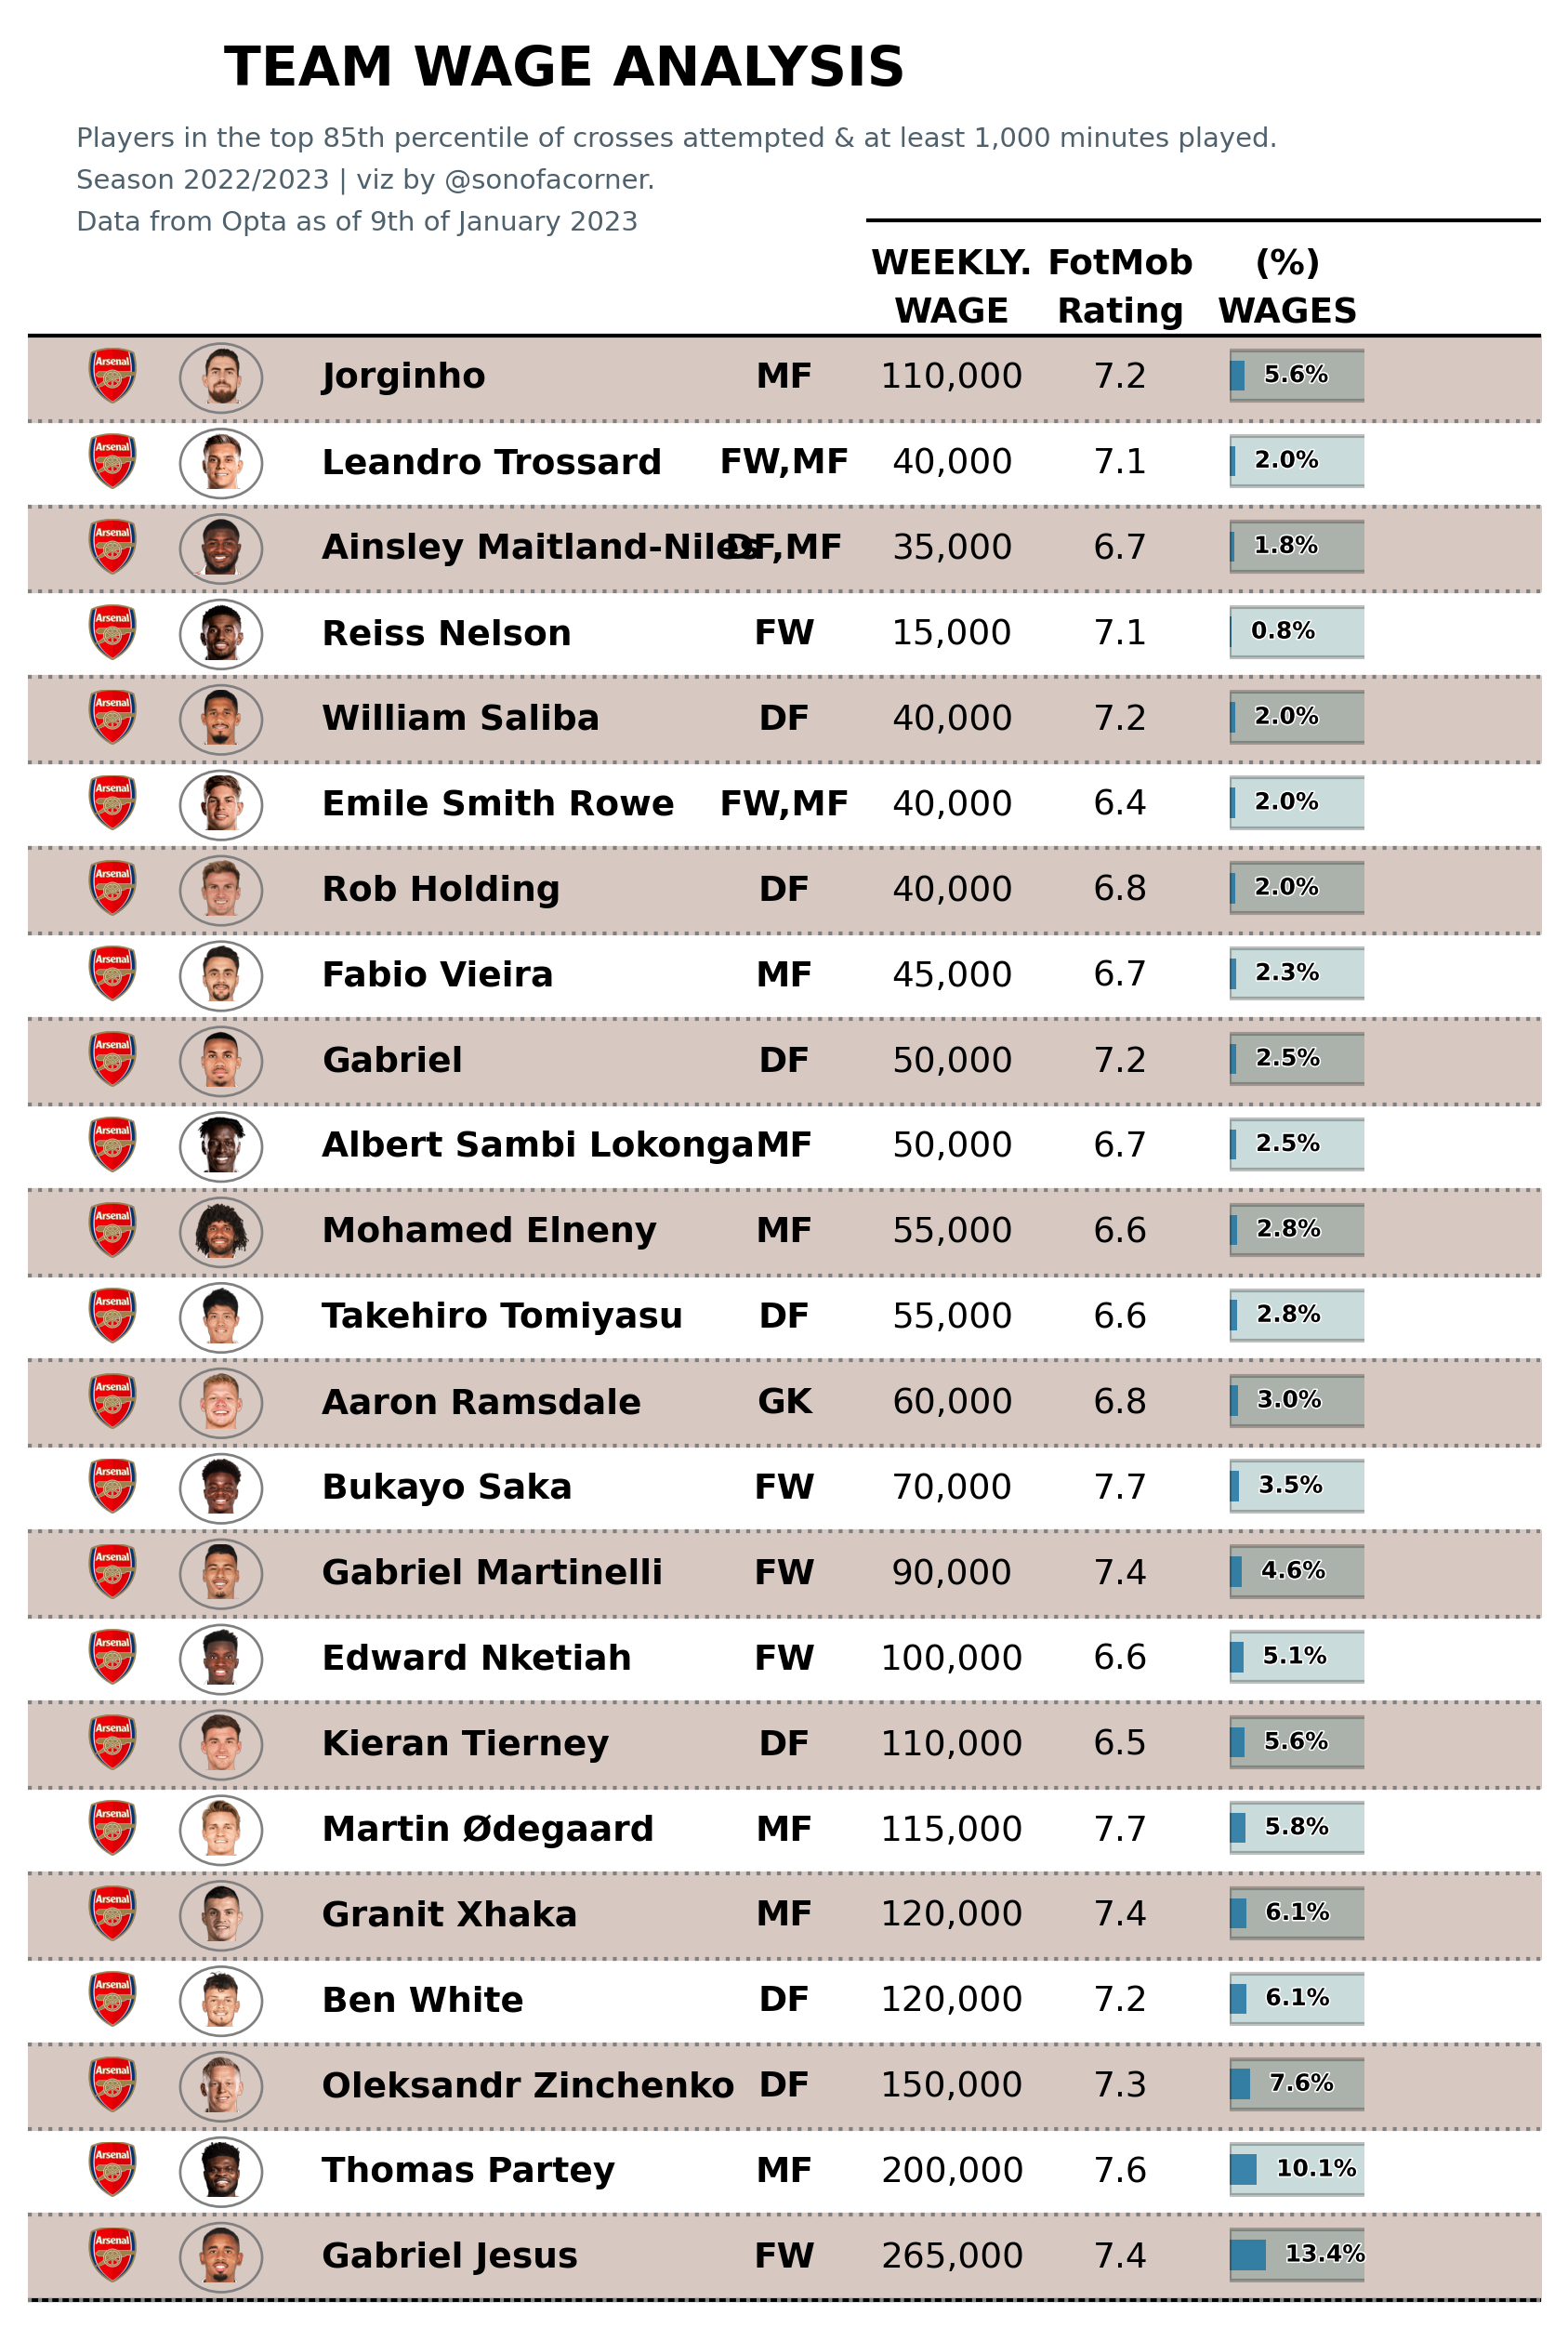

In [21]:
fig = plt.figure(figsize=(7,10), dpi=300)
ax = plt.subplot()

nrows = filtered_df.shape[0]
ncols = filtered_df.shape[1] - 3 # because I want to remove aprox. 3 columns from my DF

ax.set_xlim(0, ncols + 1)
ax.set_ylim(-.65, nrows + 1)

# calculate asymmetry of x and y axes: (I have no idea how this works)
x0, y0 = ax.transAxes.transform((0, 0)) # lower left in pixels
x1, y1 = ax.transAxes.transform((1, 1)) # upper right in pixes
dx = x1 - x0
dy = y1 - y0
maxd = max(dx, dy)
width = .35 * maxd / dx
height = .81 * maxd / dy

# Iterate
for y in range(0, nrows):
    # -- Club Logo
    bbox = Bbox.from_bounds(0, y - .295, 1, .65)
    logo_ax = fig.add_axes([0, 0, 0, 0], axes_locator=BboxLocator(bbox, ax.transData))
    draw_club_image_at_ax(filtered_df['team_id'].iloc[y], logo_ax)
    # -- Player picture
    circle = Ellipse((1.15, y), width, height, ec='grey', fc=fig.get_facecolor(), transform=ax.transData, lw=.65)
    bbox = Bbox.from_bounds(.65, y - .295, 1, .65)
    logo_ax = fig.add_axes([0, 0, 0, 0], axes_locator=BboxLocator(bbox, ax.transData))
    draw_player_image_at_ax(filtered_df['player_id'].iloc[y], logo_ax)
    ax.add_artist(circle)
    # -- Player name
    ax_text(
        x=1.75, y=y,
        s=filtered_df['Name'].iloc[y],
        weight='bold', size=9,
        ha='left', va='center', ax=ax, family='Karla'
    )
    # -- Player position
    ax_text(
        x=4.5, y=y,
        s=filtered_df['Pos'].iloc[y],
        weight='bold', size=9,
        ha='center', va='center', ax=ax
    )
    # -- Minutes played
    ax_text(
        x=5.5, y=y,
        s=f"{filtered_df['new_pound_value'].iloc[y]:,.0f}",
        size=9,
        ha='center', va='center', ax=ax
    )
    # # -- Crosses
    ax_text(
        x=6.5, y=y,
        s=f"{filtered_df['ratings'].iloc[y]:,.1f}",
        size=9,
        ha='center', va='center', ax=ax
    )
    # # -- Battery Chart
    bbox = Bbox.from_bounds(7.15, y - .295, 0.8, .65)
    battery_ax = fig.add_axes([0, 0, 0, 0], axes_locator=BboxLocator(bbox, ax.transData))
    battery_ax.set_xlim(0,0.5)
    battery_ax.barh(y=.5, width=filtered_df['wage_contribution'].iloc[y], height=.3, alpha=.85)
    battery_ax.barh(y=.5, width=1, height=.5, alpha=.25, color='#287271', ec='black')
    text_ = battery_ax.annotate(
        xy=(filtered_df['wage_contribution'].iloc[y], .5),
        xytext=(5,0),
        textcoords='offset points',
        text=f"{filtered_df['wage_contribution'].iloc[y]:.1%}",
        ha='left', va='center',
        size=6, weight='bold'
    )
    text_.set_path_effects(
                [path_effects.Stroke(linewidth=.75, foreground="white"), 
                path_effects.Normal()]
            )
    battery_ax.set_axis_off()
    

# -- Draw border lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows - .5, nrows - .5], lw=1, color='black', zorder=3)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [-.5, -.5], lw=1, color='black', zorder=3)
for x in range(nrows):
    if x % 2 == 0:
        ax.fill_between(x=[ax.get_xlim()[0], ax.get_xlim()[1]], y1=x-.5, y2=x+.5, color='#d7c8c1', zorder=-1)
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x - .5, x - .5], lw=1, color='grey', ls=':', zorder=3)

ax.set_axis_off()


# -- Column titles
ax_text(
    x=5.5, y=nrows + .05,
    s='WEEKLY.\nWAGE',
    size=9,
    ha='center', va='center', ax=ax,
    textalign='center', weight='bold'
)
ax_text(
    x=6.5, y=nrows + .05,
    s='FotMob\nRating',
    size=9,
    ha='center', va='center', ax=ax,
    textalign='center', weight='bold'
)
ax_text(
    x=7.5, y=nrows + .05,
    s='(%)\nWAGES',
    size=9,
    ha='center', va='center', ax=ax,
    textalign='center', weight='bold'
)

ax.plot([5, ax.get_xlim()[1]], [nrows + .85, nrows + .85], lw=1, color='black', zorder=3)

fig_text(
    x = 0.4, y = .92, 
    s = "TEAM WAGE ANALYSIS",
    va = "bottom", ha = "center",
    fontsize = 14, color = "black", font = "DM Sans", weight = "bold"
)
fig_text(
	x = 0.15, y = .87, 
    s = "Players in the top 85th percentile of crosses attempted & at least 1,000 minutes played.\nSeason 2022/2023 | viz by @sonofacorner.\nData from Opta as of 9th of January 2023",
	va = "bottom", ha = "left",
	fontsize = 7, color = "#4E616C", font = "DM Sans"
)

# plt.savefig(
# 	"figures/01092023_epl_crosses.png",
# 	dpi = 600,
# 	facecolor = "#EFE9E6",
# 	bbox_inches="tight",
#     edgecolor="none",
# 	transparent = False
# )

# plt.savefig(
# 	"figures/01092023_epl_crosses_tr.png",
# 	dpi = 600,
# 	facecolor = "none",
# 	bbox_inches="tight",
#     edgecolor="none",
# 	transparent = True
# )

In [65]:
from adjustText import adjust_text
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib import cm
import scipy.stats as stats

filtered_df['new_pound_value_2'] = filtered_df['new_pound_value']/1000

filtered_df['zscore'] = stats.zscore(filtered_df['new_pound_value_2'])*1 + stats.zscore(filtered_df['ratings'])*1
filtered_df['annotated'] = [True if x > filtered_df['zscore'].quantile(0) else False for x in filtered_df['zscore']]


def pound_formatter(x, pos):
    return f'£{x/1000:.0f}K'

In [66]:
filtered_df

,Name,Nation,Pos,Age,new_pound_value,URL,ratings,team_id,player_id,wage_contribution,new_pound_value_2,zscore,annotated
160,Gabriel Jesus,br BRA,FW,25.0,265000,https://www.fotmob.com/players/576165/gabriel-...,7.53,9825,576165,0.140212,265.0,3.777839,True
161,Thomas Partey,gh GHA,MF,29.0,200000,https://www.fotmob.com/players/434325/thomas-p...,7.72,9825,434325,0.105820,200.0,3.101973,True
162,Oleksandr Zinchenko,ua UKR,DF,25.0,150000,https://www.fotmob.com/players/623621/oleksand...,7.32,9825,623621,0.079365,150.0,1.348219,True
163,Ben White,eng ENG,DF,24.0,120000,https://www.fotmob.com/players/776151/ben-white,7.28,9825,776151,0.063492,120.0,0.747802,True
164,Granit Xhaka,ch SUI,MF,29.0,120000,https://www.fotmob.com/players/207236/granit-x...,7.44,9825,207236,0.063492,120.0,1.109270,True
165,Martin Ødegaard,no NOR,MF,23.0,115000,https://www.fotmob.com/players/534670/martin-d...,7.71,9825,534670,0.060847,115.0,1.634238,True
166,Kieran Tierney,sct SCO,DF,25.0,110000,https://www.fotmob.com/players/582499/kieran-t...,6.63,9825,582499,0.058201,110.0,-0.890679,True
167,Edward Nketiah,eng ENG,FW,23.0,100000,https://www.fotmob.com/players/860920/edward-n...,6.74,9825,860920,0.052910,100.0,-0.812186,True
168,Gabriel Martinelli,br BRA,FW,21.0,90000,https://www.fotmob.com/players/1021586/gabriel...,7.53,9825,1021586,0.047619,90.0,0.802545,True
170,Bukayo Saka,eng ENG,FW,20.0,70000,https://www.fotmob.com/players/961995/bukayo-saka,7.79,9825,961995,0.037037,70.0,1.049897,True


/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  app.launch_new_instance()
/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  app.launch_new_instance()


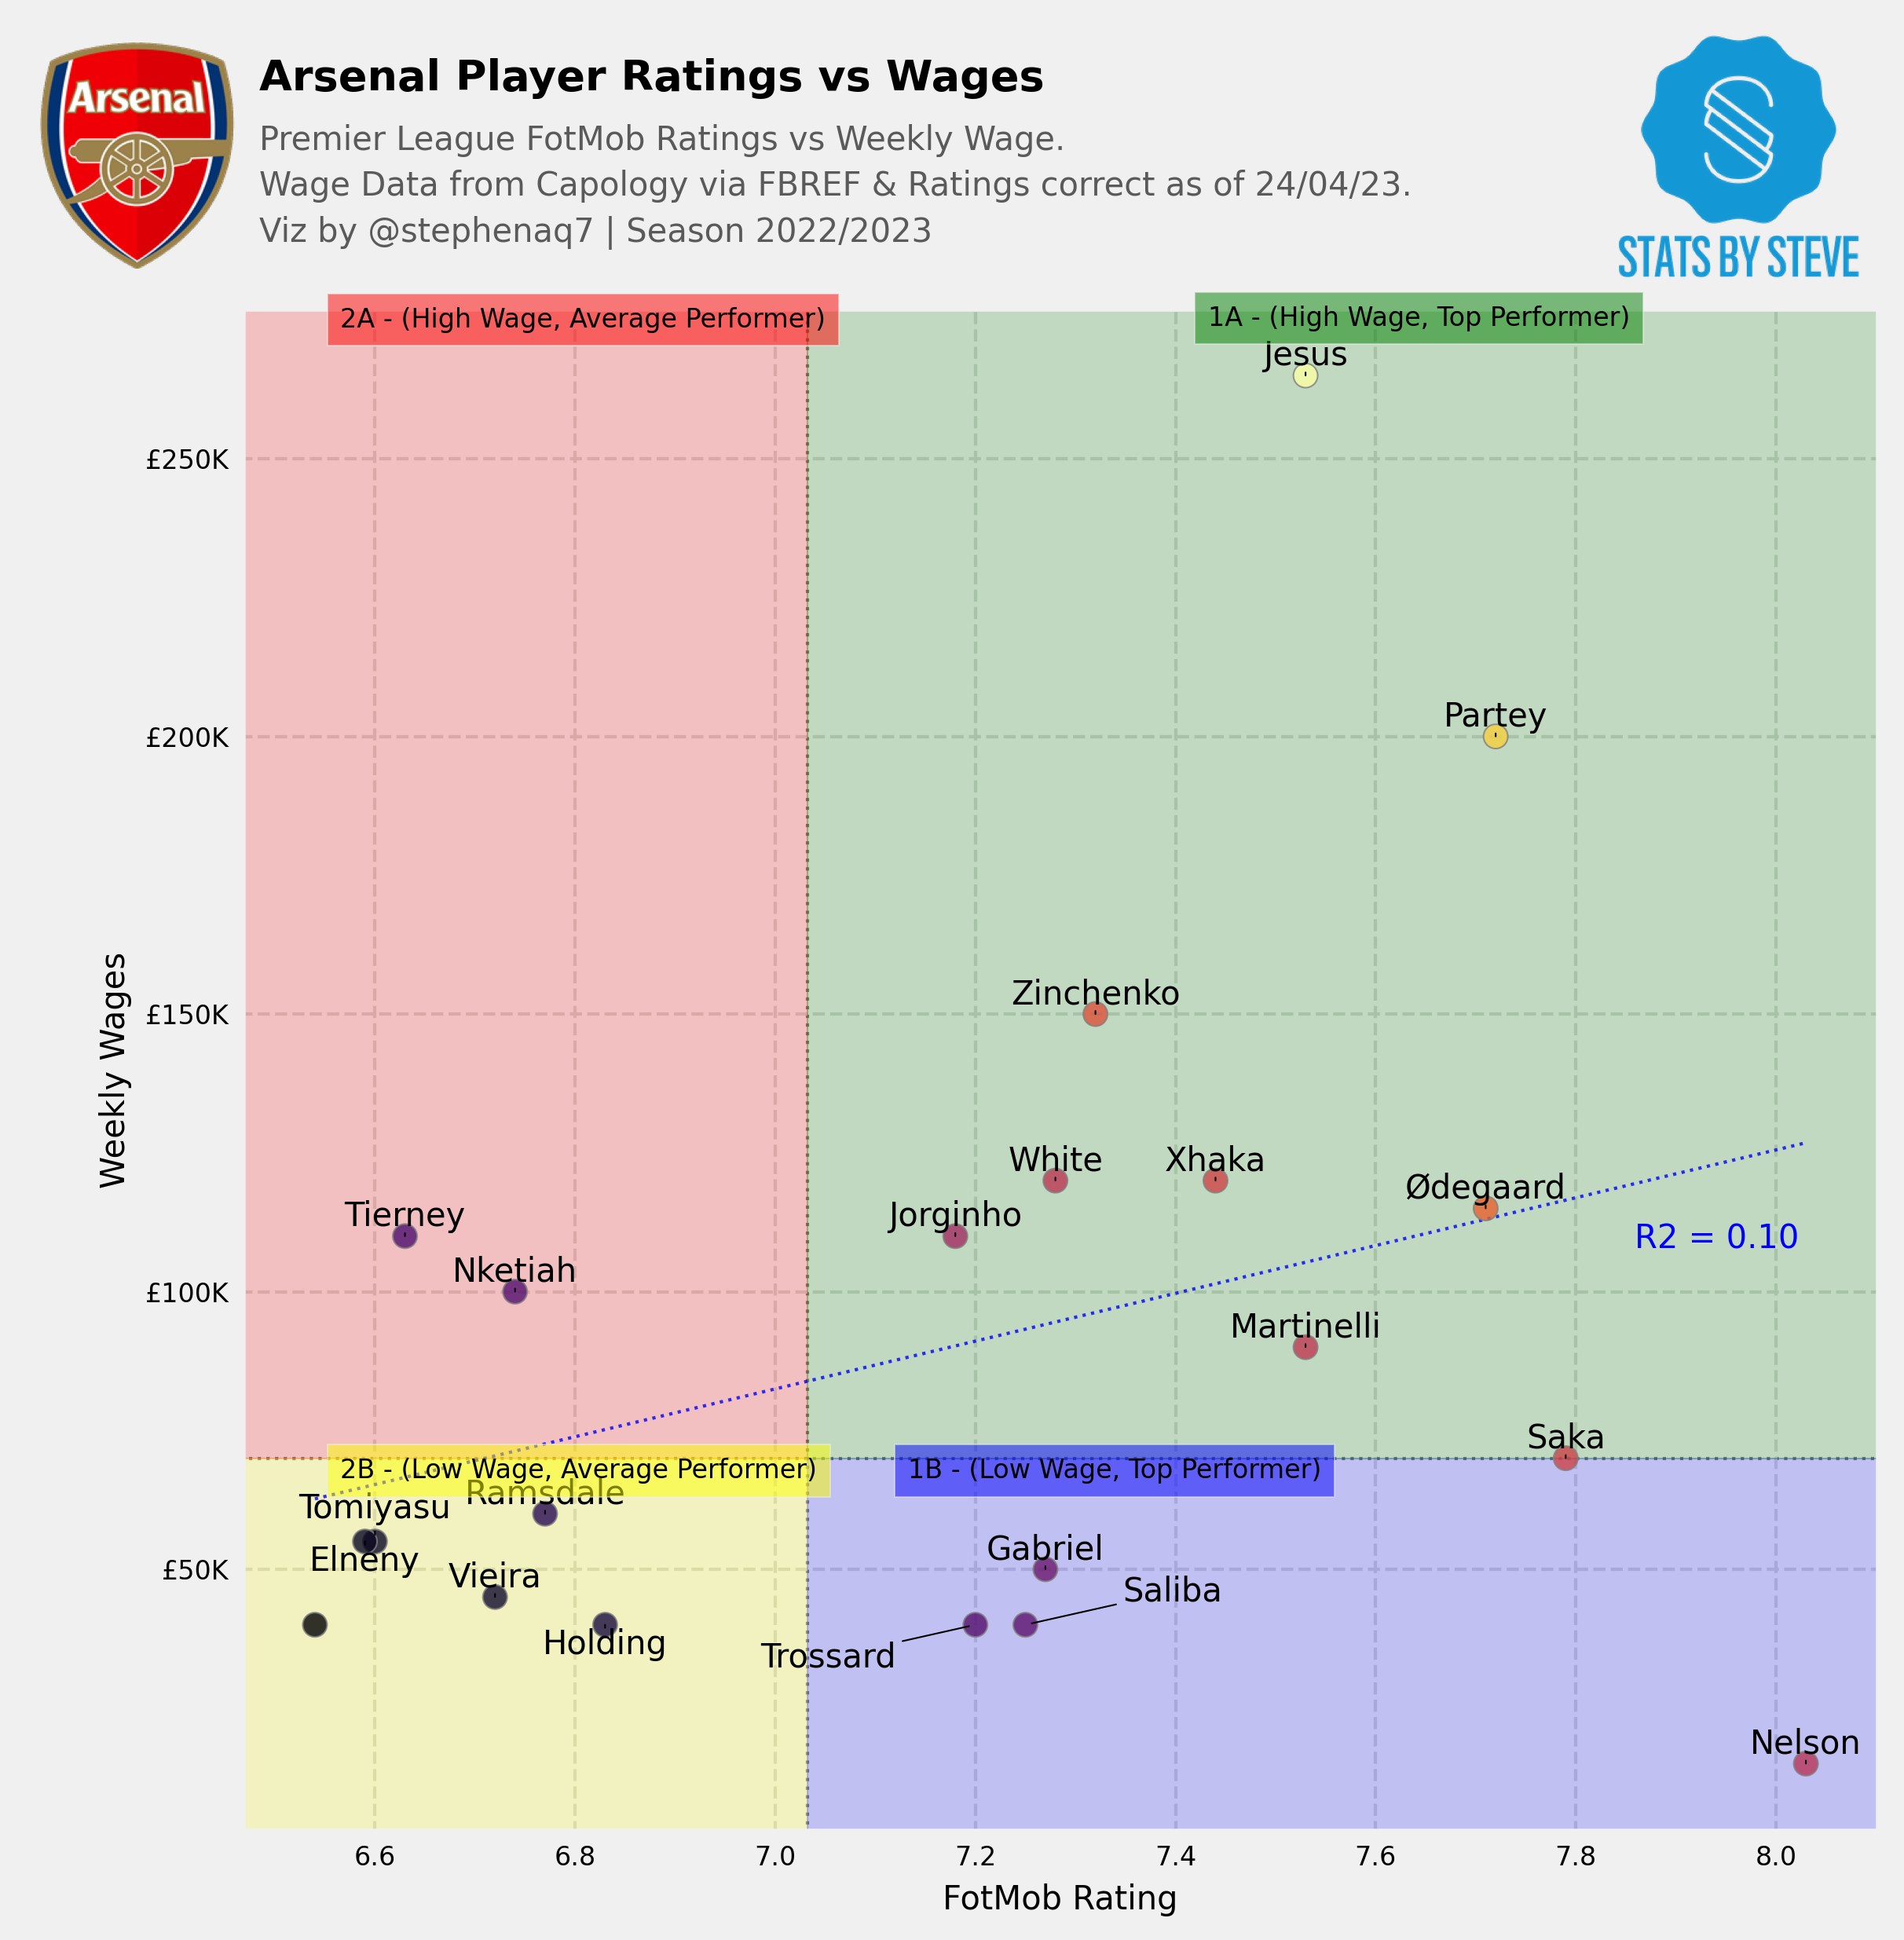

In [147]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.image as image
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
from adjustText import adjust_text
import math

# Define a custom formatter for y-axis tick labels
max_ = max(abs(filtered_df['new_pound_value_2'].min()), filtered_df['new_pound_value_2'].max())

fig = plt.figure(figsize=(8, 8), dpi=300)
ax = plt.subplot()
ax.grid(visible=False, ls='--', color='lightgrey')

# Define quadrants based on median values of 'ratings' and 'new_pound_value_2'
median_ratings = ((filtered_df['ratings'].median())*0.97)
median_wages = filtered_df['new_pound_value_2'].median()

# Plot scatter points for each quadrant
scatter = ax.scatter(
    filtered_df['ratings'], filtered_df['new_pound_value_2'],
    c=filtered_df['zscore'], cmap='inferno',
    zorder=3, ec='grey', s=55, alpha=0.8)

texts = []
annotated_df = filtered_df[filtered_df['annotated']].reset_index(drop=True)
for index in range(annotated_df.shape[0]):
    # Extract last name from 'Name' column by splitting on space and taking the last element
    last_name = annotated_df['Name'].iloc[index].split()[-1]
    texts += [
        ax.text(
            x=annotated_df['ratings'].iloc[index], y=annotated_df['new_pound_value_2'].iloc[index],
            s=f"{last_name}",
            color='black',
            family='DM Sans', weight='light', fontsize=10 
        )
    ]

# Use adjust_text function to move overlapping texts
adjust_text(texts, force_text=(2, 2),
            arrowprops=dict(arrowstyle='-',color='black'),
            autoalign='y',
            only_move={'points':'y'})


# Add dotted line to separate quadrants
ax.axvline(median_ratings, linestyle='dotted', color='grey', lw=1, zorder=0)
ax.axhline(median_wages, linestyle='dotted', color='grey', lw=1, zorder=0)


# Set x-axis and y-axis limits to be equal
ax.set_xlim([ax.get_xlim()[0], ax.get_xlim()[1]])
ax.set_ylim([ax.get_ylim()[0], ax.get_ylim()[1]])

# Fill quadrants with transparent colors
ax.fill_between(
    [ax.get_xlim()[0], median_ratings],
    ax.get_ylim()[0], median_wages,
    color='yellow', alpha=0.2
)
ax.fill_between(
    [median_ratings, ax.get_xlim()[1]],
    ax.get_ylim()[0], median_wages,
    color='blue', alpha=0.2
)
ax.fill_between(
    [ax.get_xlim()[0], median_ratings],
    median_wages, ax.get_ylim()[1],
    color='red', alpha=0.2
)
ax.fill_between(
    [median_ratings, ax.get_xlim()[1]],
    median_wages, ax.get_ylim()[1],
    color='green', alpha=0.2
)

ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=False, prune='both'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'£{x:.0f}K'))
ax.tick_params(axis='both', labelsize=8)  # Updated fontsize to 8

ax.set_ylabel('Weekly Wages', fontsize=10)  # Set y-axis label with font size
ax.set_xlabel('FotMob Rating', fontsize=10)

ax.text(ax.get_xlim()[0] + 0.1, ax.get_ylim()[1] - 0.1,
        '2A - (High Wage, Average Performer)',
        bbox=dict(facecolor='red', alpha=0.5),
        horizontalalignment='left', verticalalignment='top',
        fontsize=8, color='black')
ax.text(ax.get_xlim()[0] + 0.1, median_wages + 0.1,
        '2B - (Low Wage, Average Performer)',
        bbox=dict(facecolor='yellow', alpha=0.5),
        horizontalalignment='left', verticalalignment='top',
        fontsize=8, color='black')
ax.text(median_ratings + 0.4, ax.get_ylim()[1] + 0.15,
        '1A - (High Wage, Top Performer)',
        bbox=dict(facecolor='green', alpha=0.5),
        horizontalalignment='left', verticalalignment='top',
        fontsize=8, color='black')
ax.text(median_ratings + 0.1, median_wages + 0.1,
        '1B - (Low Wage, Top Performer)',
        bbox=dict(facecolor='blue', alpha=0.5),
        horizontalalignment='left', verticalalignment='top',
        fontsize=8, color='black')

coefficients = np.polyfit(filtered_df['ratings'], filtered_df['new_pound_value_2'], 1)
p = np.poly1d(coefficients)
x_regression = np.linspace(np.min(filtered_df['ratings']), np.max(filtered_df['ratings']), 100)
y_regression = p(x_regression)

# Plot the regression line
ax.plot(x_regression, y_regression, c='b', label='Regression Line', linewidth=1, linestyle=':', alpha=0.8)

# Add R2 value as text
r2 = np.corrcoef(filtered_df['ratings'], filtered_df['new_pound_value_2'])[0, 1] ** 2  # Calculate R2 value
ax.text(0.85, 0.4, f'R2 = {r2:.2f}', transform=ax.transAxes, ha='left', va='top',fontsize=10,color='blue')





ax3 = fig.add_axes([0.78, 0.89, 0.19, 0.14])
ax3.axis('off')
img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/outputs/logo_transparent_background.png')
ax3.imshow(img)




fig_text(
    x=0.09, y=.99,
    s="Arsenal Player Ratings vs Wages",
    va="bottom", ha="left",
    fontsize= 13, color="black", font="DM Sans", weight="bold"
)
fig_text(
    x=0.09, y=0.91,
    s="Premier League FotMob Ratings vs Weekly Wage.\nWage Data from Capology via FBREF & Ratings correct as of 24/04/23.\nViz by @stephenaq7 | Season 2022/2023",
    va="bottom", ha="left",
    fontsize=10, color="#5A5A5A", font="Karla"
)
fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"

logo_ax = fig.add_axes([-0.08, .90, 0.21, 0.12], zorder=1)
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{t_id}.png"))
logo_ax.imshow(club_icon)
logo_ax.axis("off")


plt.show()


In [148]:
# 8455

t_id = 8455
filtered_df = merged_df[merged_df['team_id'] == 8455]
filtered_df['player_id'] = filtered_df['URL'].str.extract(r'(\d+)')
filtered_df = filtered_df[filtered_df['ratings'].notna()]

total_wages = filtered_df['new_pound_value'].sum()

# Calculate wage contribution percentage
filtered_df['wage_contribution'] = (filtered_df['new_pound_value'] / total_wages)
filtered_df


filtered_df['new_pound_value_2'] = filtered_df['new_pound_value']/1000

filtered_df['zscore'] = stats.zscore(filtered_df['new_pound_value_2'])*1 + stats.zscore(filtered_df['ratings'])*1
filtered_df['annotated'] = [True if x > filtered_df['zscore'].quantile(0) else False for x in filtered_df['zscore']]


def pound_formatter(x, pos):
    return f'£{x/1000:.0f}K'

/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  
/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  


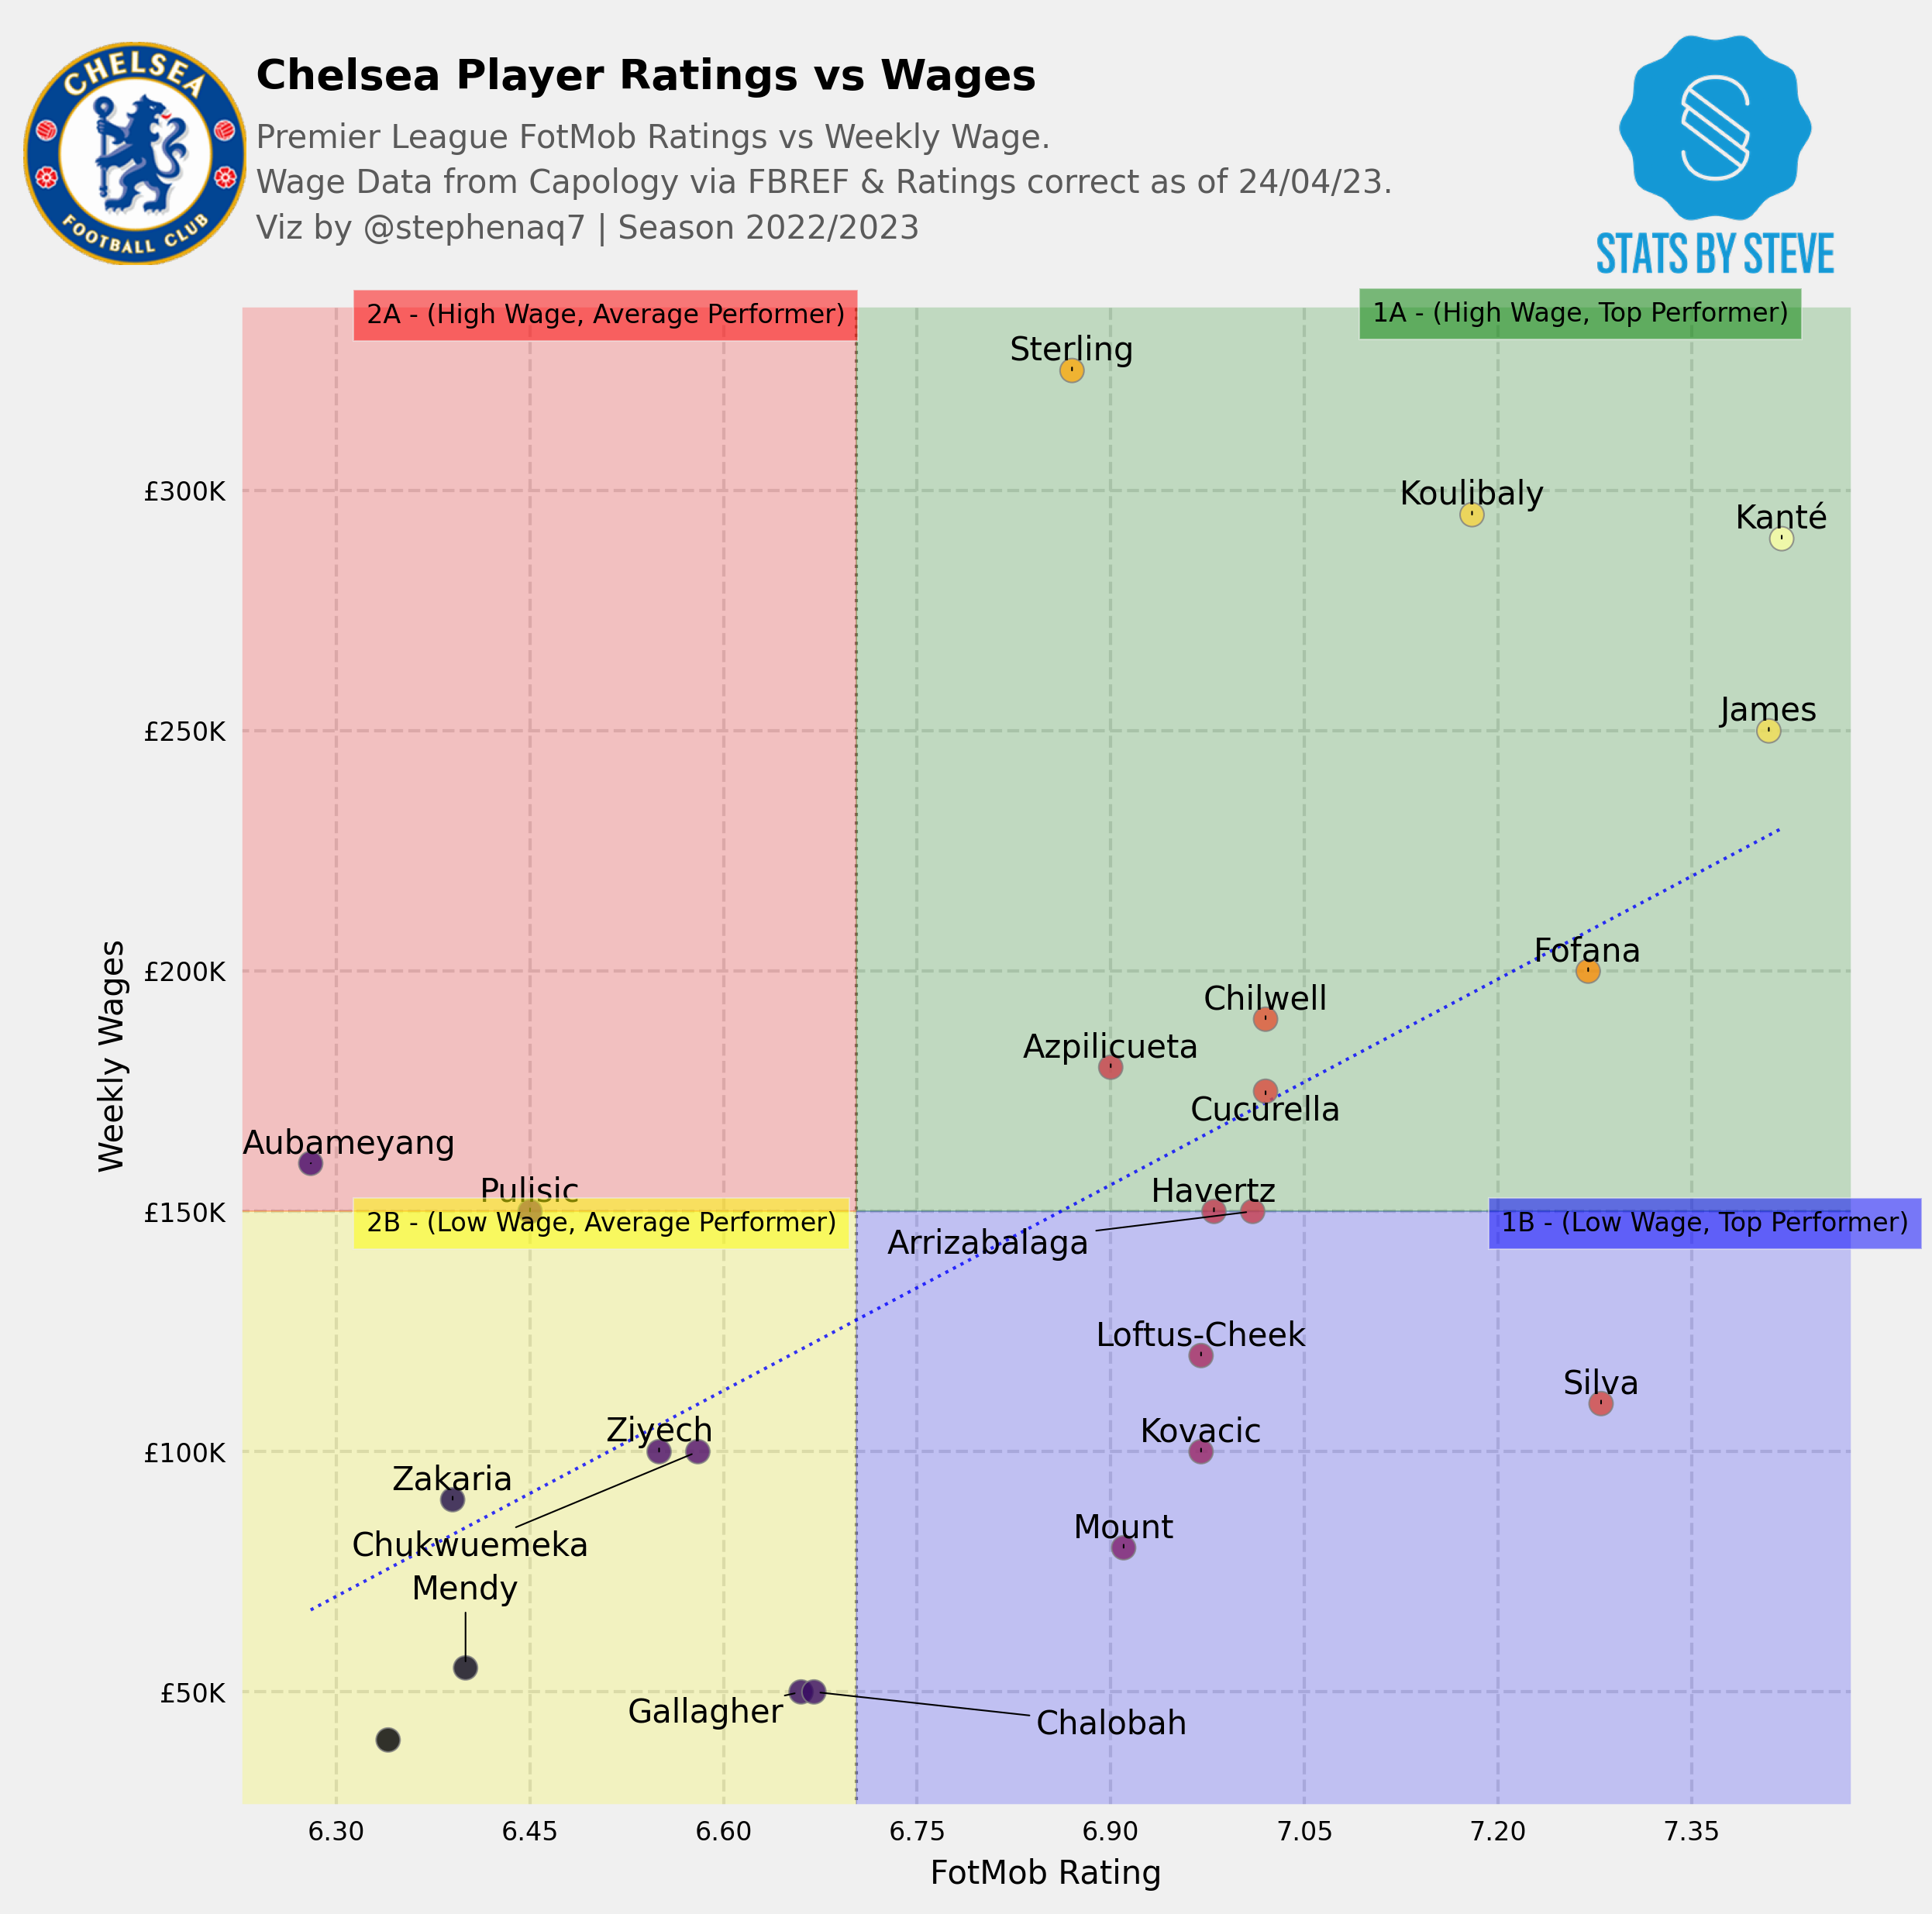

In [151]:


# Define a custom formatter for y-axis tick labels
max_ = max(abs(filtered_df['new_pound_value_2'].min()), filtered_df['new_pound_value_2'].max())

fig = plt.figure(figsize=(8, 8), dpi=300)
ax = plt.subplot()
ax.grid(visible=False, ls='--', color='lightgrey')

# Define quadrants based on median values of 'ratings' and 'new_pound_value_2'
median_ratings = ((filtered_df['ratings'].median())*0.97)
median_wages = filtered_df['new_pound_value_2'].median()

# Plot scatter points for each quadrant
scatter = ax.scatter(
    filtered_df['ratings'], filtered_df['new_pound_value_2'],
    c=filtered_df['zscore'], cmap='inferno',
    zorder=3, ec='grey', s=55, alpha=0.8)

texts = []
annotated_df = filtered_df[filtered_df['annotated']].reset_index(drop=True)
for index in range(annotated_df.shape[0]):
    # Extract last name from 'Name' column by splitting on space and taking the last element
    last_name = annotated_df['Name'].iloc[index].split()[-1]
    texts += [
        ax.text(
            x=annotated_df['ratings'].iloc[index], y=annotated_df['new_pound_value_2'].iloc[index],
            s=f"{last_name}",
            color='black',
            family='DM Sans', weight='light', fontsize=10 
        )
    ]

# Use adjust_text function to move overlapping texts
adjust_text(texts, force_text=(2, 2),
            arrowprops=dict(arrowstyle='-',color='black'),
            autoalign='y',
            only_move={'points':'y'})


# Add dotted line to separate quadrants
ax.axvline(median_ratings, linestyle='dotted', color='grey', lw=1, zorder=0)
ax.axhline(median_wages, linestyle='dotted', color='grey', lw=1, zorder=0)


# Set x-axis and y-axis limits to be equal
ax.set_xlim([ax.get_xlim()[0], ax.get_xlim()[1]])
ax.set_ylim([ax.get_ylim()[0], ax.get_ylim()[1]])

# Fill quadrants with transparent colors
ax.fill_between(
    [ax.get_xlim()[0], median_ratings],
    ax.get_ylim()[0], median_wages,
    color='yellow', alpha=0.2
)
ax.fill_between(
    [median_ratings, ax.get_xlim()[1]],
    ax.get_ylim()[0], median_wages,
    color='blue', alpha=0.2
)
ax.fill_between(
    [ax.get_xlim()[0], median_ratings],
    median_wages, ax.get_ylim()[1],
    color='red', alpha=0.2
)
ax.fill_between(
    [median_ratings, ax.get_xlim()[1]],
    median_wages, ax.get_ylim()[1],
    color='green', alpha=0.2
)

ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=False, prune='both'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'£{x:.0f}K'))
ax.tick_params(axis='both', labelsize=8)  # Updated fontsize to 8

ax.set_ylabel('Weekly Wages', fontsize=10)  # Set y-axis label with font size
ax.set_xlabel('FotMob Rating', fontsize=10)

ax.text(ax.get_xlim()[0] + 0.1, ax.get_ylim()[1] - 0.1,
        '2A - (High Wage, Average Performer)',
        bbox=dict(facecolor='red', alpha=0.5),
        horizontalalignment='left', verticalalignment='top',
        fontsize=8, color='black')
ax.text(ax.get_xlim()[0] + 0.1, median_wages + 0.1,
        '2B - (Low Wage, Average Performer)',
        bbox=dict(facecolor='yellow', alpha=0.5),
        horizontalalignment='left', verticalalignment='top',
        fontsize=8, color='black')
ax.text(median_ratings + 0.4, ax.get_ylim()[1] + 0.15,
        '1A - (High Wage, Top Performer)',
        bbox=dict(facecolor='green', alpha=0.5),
        horizontalalignment='left', verticalalignment='top',
        fontsize=8, color='black')
ax.text(median_ratings + 0.5, median_wages + 0.1,
        '1B - (Low Wage, Top Performer)',
        bbox=dict(facecolor='blue', alpha=0.5),
        horizontalalignment='left', verticalalignment='top',
        fontsize=8, color='black')

coefficients = np.polyfit(filtered_df['ratings'], filtered_df['new_pound_value_2'], 1)
p = np.poly1d(coefficients)
x_regression = np.linspace(np.min(filtered_df['ratings']), np.max(filtered_df['ratings']), 100)
y_regression = p(x_regression)

# Plot the regression line
ax.plot(x_regression, y_regression, c='b', label='Regression Line', linewidth=1, linestyle=':', alpha=0.8)




ax3 = fig.add_axes([0.78, 0.89, 0.19, 0.14])
ax3.axis('off')
img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/outputs/logo_transparent_background.png')
ax3.imshow(img)




fig_text(
    x=0.09, y=.99,
    s="Chelsea Player Ratings vs Wages",
    va="bottom", ha="left",
    fontsize= 13, color="black", font="DM Sans", weight="bold"
)
fig_text(
    x=0.09, y=0.91,
    s="Premier League FotMob Ratings vs Weekly Wage.\nWage Data from Capology via FBREF & Ratings correct as of 24/04/23.\nViz by @stephenaq7 | Season 2022/2023",
    va="bottom", ha="left",
    fontsize=10, color="#5A5A5A", font="Karla"
)
fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"

logo_ax = fig.add_axes([-0.08, .90, 0.21, 0.12], zorder=1)
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{t_id}.png"))
logo_ax.imshow(club_icon)
logo_ax.axis("off")


plt.show()


In [168]:
# 8455

t_id = 8463
filtered_df = merged_df[merged_df['team_id'] == 8463]
filtered_df['player_id'] = filtered_df['URL'].str.extract(r'(\d+)')
filtered_df = filtered_df[filtered_df['ratings'].notna()]

total_wages = filtered_df['new_pound_value'].sum()

# Calculate wage contribution percentage
filtered_df['wage_contribution'] = (filtered_df['new_pound_value'] / total_wages)
filtered_df


filtered_df['new_pound_value_2'] = filtered_df['new_pound_value']/1000

filtered_df['zscore'] = stats.zscore(filtered_df['new_pound_value_2'])*1 + stats.zscore(filtered_df['ratings'])*1
filtered_df['annotated'] = [True if x > filtered_df['zscore'].quantile(0) else False for x in filtered_df['zscore']]


def pound_formatter(x, pos):
    return f'£{x/1000:.0f}K'

/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  
/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  


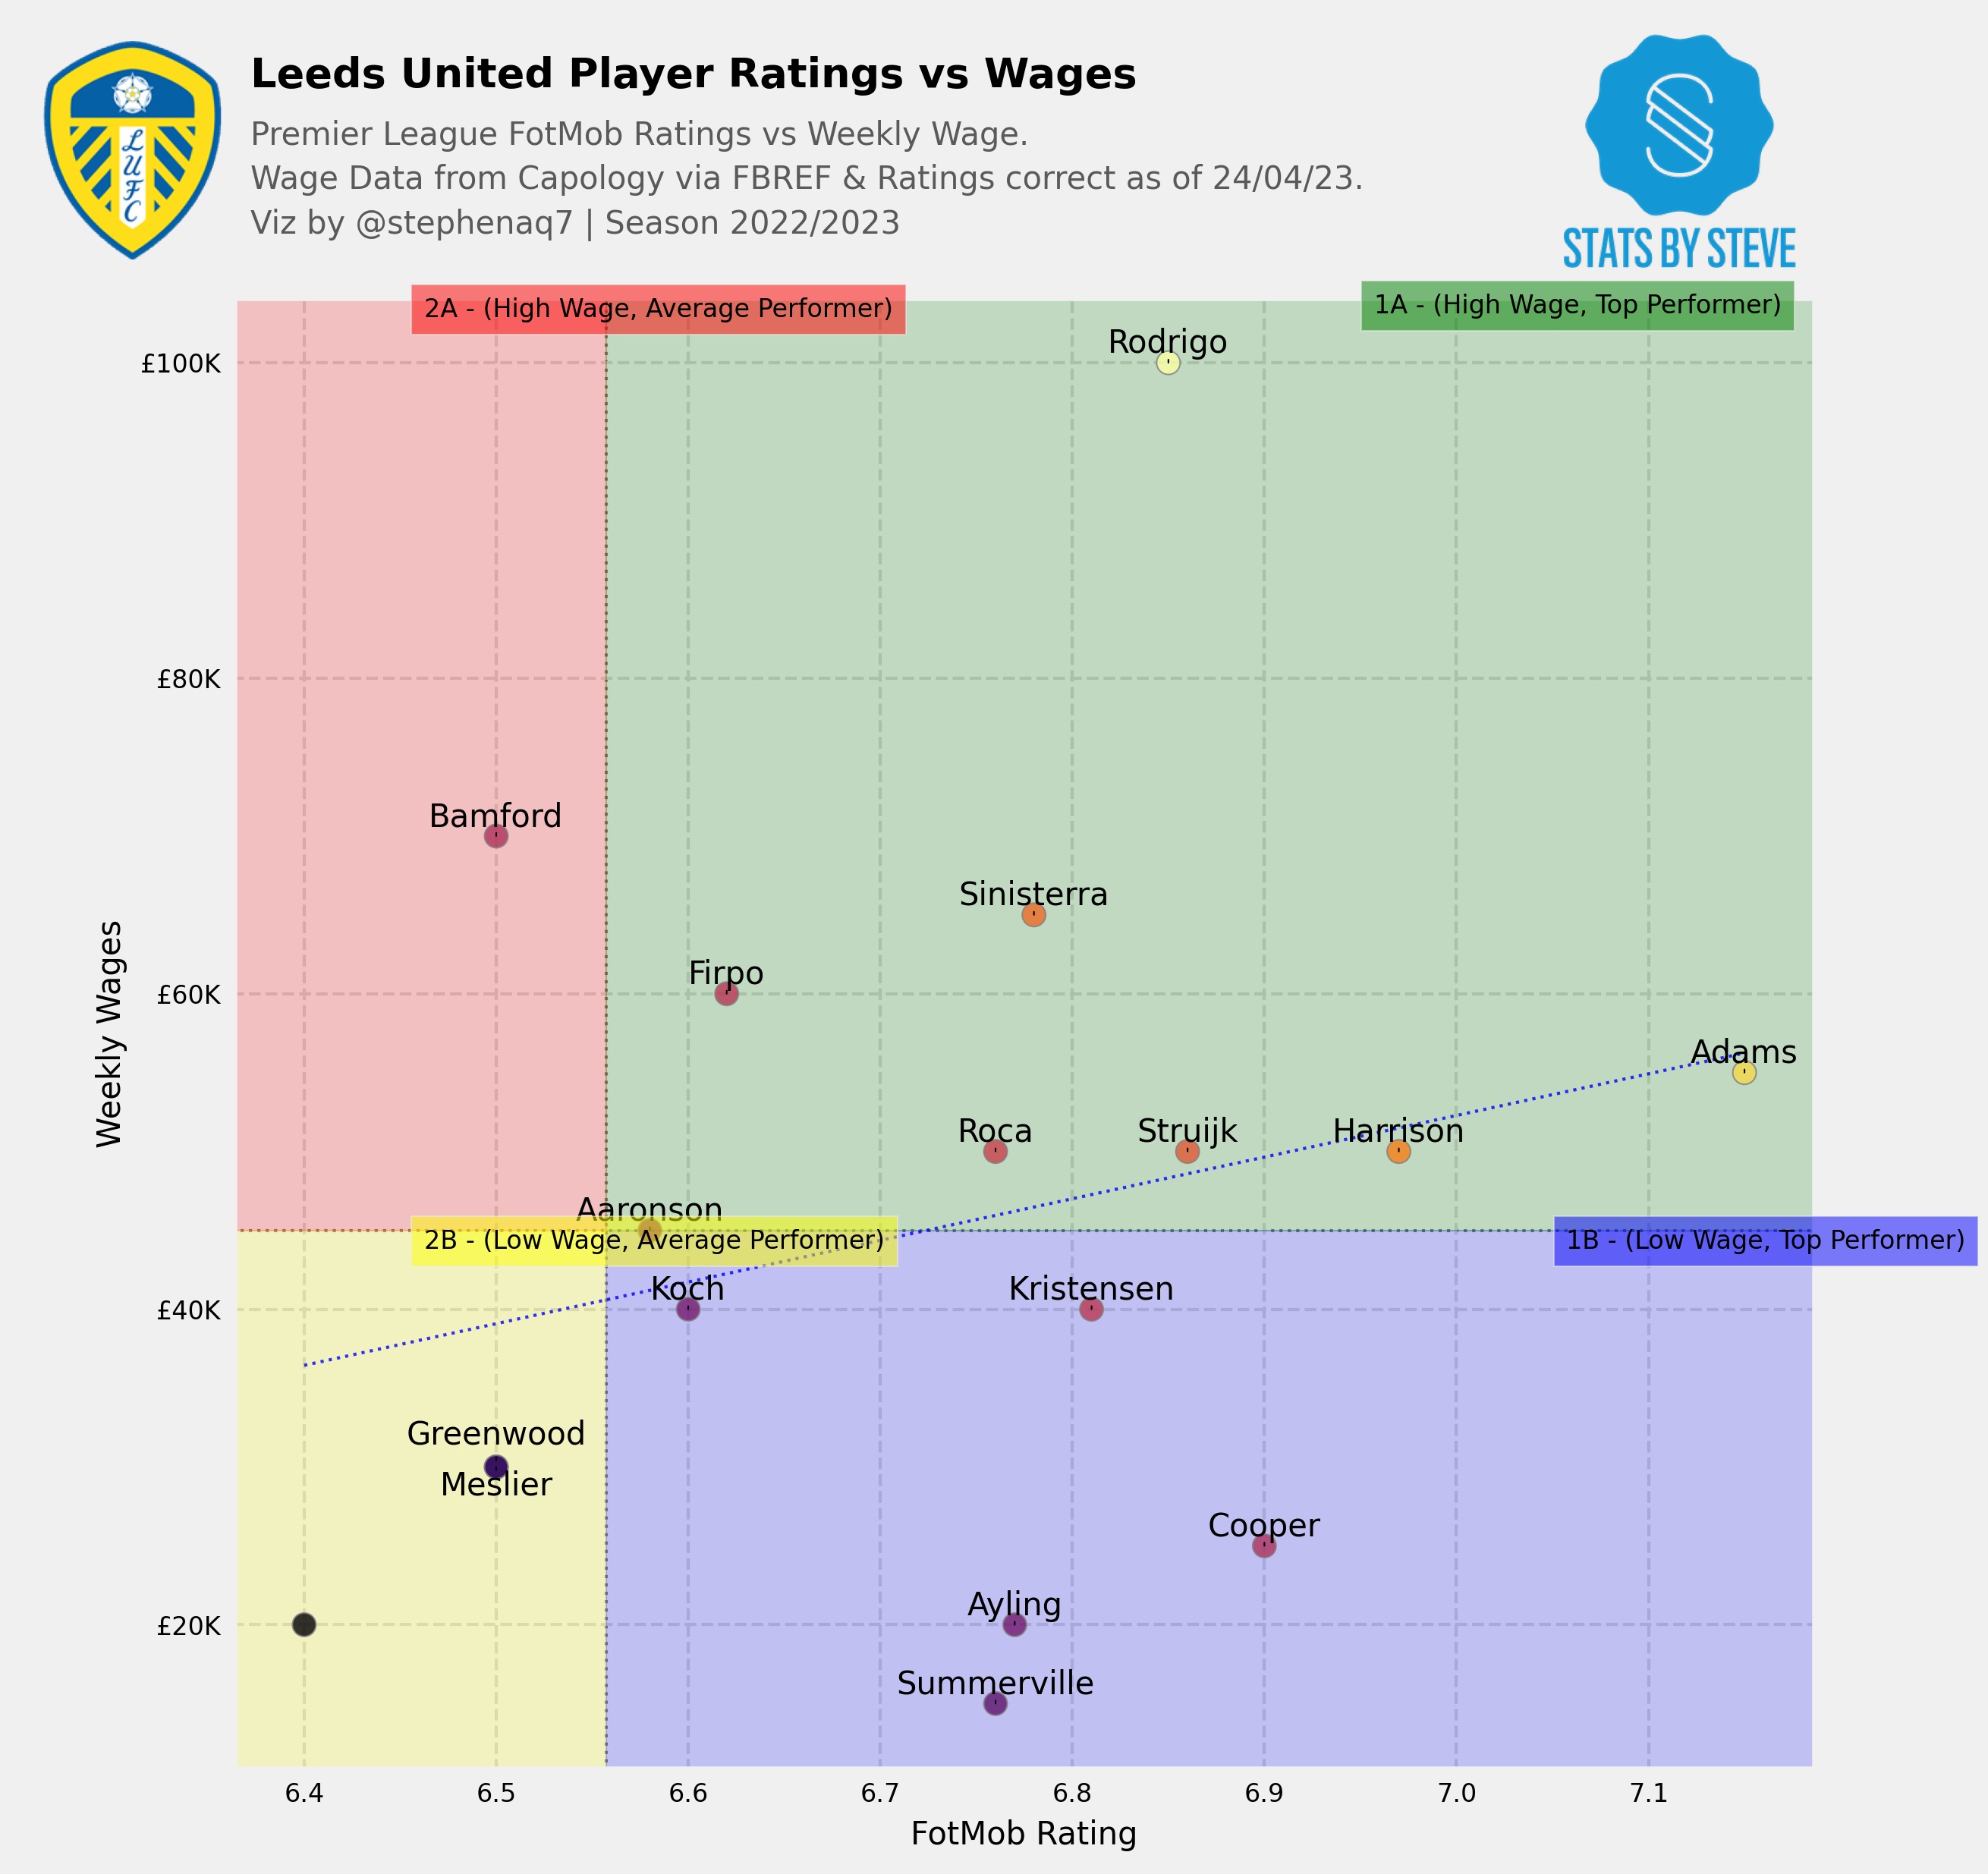

In [171]:


# Define a custom formatter for y-axis tick labels
max_ = max(abs(filtered_df['new_pound_value_2'].min()), filtered_df['new_pound_value_2'].max())

fig = plt.figure(figsize=(8, 8), dpi=300)
ax = plt.subplot()
ax.grid(visible=False, ls='--', color='lightgrey')

# Define quadrants based on median values of 'ratings' and 'new_pound_value_2'
median_ratings = ((filtered_df['ratings'].median())*0.97)
median_wages = filtered_df['new_pound_value_2'].median()

# Plot scatter points for each quadrant
scatter = ax.scatter(
    filtered_df['ratings'], filtered_df['new_pound_value_2'],
    c=filtered_df['zscore'], cmap='inferno',
    zorder=3, ec='grey', s=55, alpha=0.8)

texts = []
annotated_df = filtered_df[filtered_df['annotated']].reset_index(drop=True)
for index in range(annotated_df.shape[0]):
    # Extract last name from 'Name' column by splitting on space and taking the last element
    last_name = annotated_df['Name'].iloc[index].split()[-1]
    texts += [
        ax.text(
            x=annotated_df['ratings'].iloc[index], y=annotated_df['new_pound_value_2'].iloc[index],
            s=f"{last_name}",
            color='black',
            family='DM Sans', weight='light', fontsize=10 
        )
    ]

# Use adjust_text function to move overlapping texts
adjust_text(texts, force_text=(2, 2),
            arrowprops=dict(arrowstyle='-',color='black'),
            autoalign='y',
            only_move={'points':'y'})


# Add dotted line to separate quadrants
ax.axvline(median_ratings, linestyle='dotted', color='grey', lw=1, zorder=0)
ax.axhline(median_wages, linestyle='dotted', color='grey', lw=1, zorder=0)


# Set x-axis and y-axis limits to be equal
ax.set_xlim([ax.get_xlim()[0], ax.get_xlim()[1]])
ax.set_ylim([ax.get_ylim()[0], ax.get_ylim()[1]])

# Fill quadrants with transparent colors
ax.fill_between(
    [ax.get_xlim()[0], median_ratings],
    ax.get_ylim()[0], median_wages,
    color='yellow', alpha=0.2
)
ax.fill_between(
    [median_ratings, ax.get_xlim()[1]],
    ax.get_ylim()[0], median_wages,
    color='blue', alpha=0.2
)
ax.fill_between(
    [ax.get_xlim()[0], median_ratings],
    median_wages, ax.get_ylim()[1],
    color='red', alpha=0.2
)
ax.fill_between(
    [median_ratings, ax.get_xlim()[1]],
    median_wages, ax.get_ylim()[1],
    color='green', alpha=0.2
)

ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=False, prune='both'))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'£{x:.0f}K'))
ax.tick_params(axis='both', labelsize=8)  # Updated fontsize to 8

ax.set_ylabel('Weekly Wages', fontsize=10)  # Set y-axis label with font size
ax.set_xlabel('FotMob Rating', fontsize=10)

ax.text(ax.get_xlim()[0] + 0.1, ax.get_ylim()[1] - 0.1,
        '2A - (High Wage, Average Performer)',
        bbox=dict(facecolor='red', alpha=0.5),
        horizontalalignment='left', verticalalignment='top',
        fontsize=8, color='black')
ax.text(ax.get_xlim()[0] + 0.1, median_wages + 0.1,
        '2B - (Low Wage, Average Performer)',
        bbox=dict(facecolor='yellow', alpha=0.5),
        horizontalalignment='left', verticalalignment='top',
        fontsize=8, color='black')
ax.text(median_ratings + 0.4, ax.get_ylim()[1] + 0.15,
        '1A - (High Wage, Top Performer)',
        bbox=dict(facecolor='green', alpha=0.5),
        horizontalalignment='left', verticalalignment='top',
        fontsize=8, color='black')
ax.text(median_ratings + 0.5, median_wages + 0.1,
        '1B - (Low Wage, Top Performer)',
        bbox=dict(facecolor='blue', alpha=0.5),
        horizontalalignment='left', verticalalignment='top',
        fontsize=8, color='black')

coefficients = np.polyfit(filtered_df['ratings'], filtered_df['new_pound_value_2'], 1)
p = np.poly1d(coefficients)
x_regression = np.linspace(np.min(filtered_df['ratings']), np.max(filtered_df['ratings']), 100)
y_regression = p(x_regression)

# Plot the regression line
ax.plot(x_regression, y_regression, c='b', label='Regression Line', linewidth=1, linestyle=':', alpha=0.8)




ax3 = fig.add_axes([0.78, 0.89, 0.19, 0.14])
ax3.axis('off')
img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/outputs/logo_transparent_background.png')
ax3.imshow(img)




fig_text(
    x=0.09, y=.99,
    s="Leeds United Player Ratings vs Wages",
    va="bottom", ha="left",
    fontsize= 13, color="black", font="DM Sans", weight="bold"
)
fig_text(
    x=0.09, y=0.91,
    s="Premier League FotMob Ratings vs Weekly Wage.\nWage Data from Capology via FBREF & Ratings correct as of 24/04/23.\nViz by @stephenaq7 | Season 2022/2023",
    va="bottom", ha="left",
    fontsize=10, color="#5A5A5A", font="Karla"
)
fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"

logo_ax = fig.add_axes([-0.08, .90, 0.21, 0.12], zorder=1)
club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{t_id}.png"))
logo_ax.imshow(club_icon)
logo_ax.axis("off")


plt.show()


In [22]:
grouped_df = merged_df.groupby('team_id').agg({'new_pound_value': 'sum', 'ratings': 'mean'})

# Rank the columns 'new_pound_value' and 'ratings'
grouped_df['new_pound_value_rank'] = grouped_df['new_pound_value'].rank(ascending=False)
grouped_df['ratings_rank'] = grouped_df['ratings'].rank(ascending=False)

# Reset the index to bring back 'team_id' as a column
grouped_df = grouped_df.reset_index()

# Pivot the table to show rankings as columns
pivot_table = pd.pivot_table(grouped_df, index='team_id', values=['new_pound_value_rank', 'ratings_rank'])


In [23]:
team_names = pd.read_csv("CSVs/fotmob_epl_team_ids.csv")
pivot_table= pivot_table.reset_index()
wage_vs_rating = pd.merge(pivot_table, team_names, on='team_id')

In [24]:
wage_vs_rating = wage_vs_rating[["team", "team_id",	"new_pound_value_rank",	"ratings_rank"]]


In [25]:
wage_vs_rating

,team,team_id,new_pound_value_rank,ratings_rank
0,Leicester City,8197,11.0,13.0
1,Chelsea,8455,3.0,11.0
2,Manchester City,8456,2.0,1.0
3,Leeds United,8463,16.0,19.0
4,Southampton,8466,15.0,18.0
5,Tottenham,8586,5.0,6.0
6,Wolves,8602,14.0,16.0
7,Liverpool,8650,4.0,2.0
8,West Ham,8654,8.0,14.0
9,Everton,8668,9.0,9.0


NameError: name 'fotmob_url' is not defined

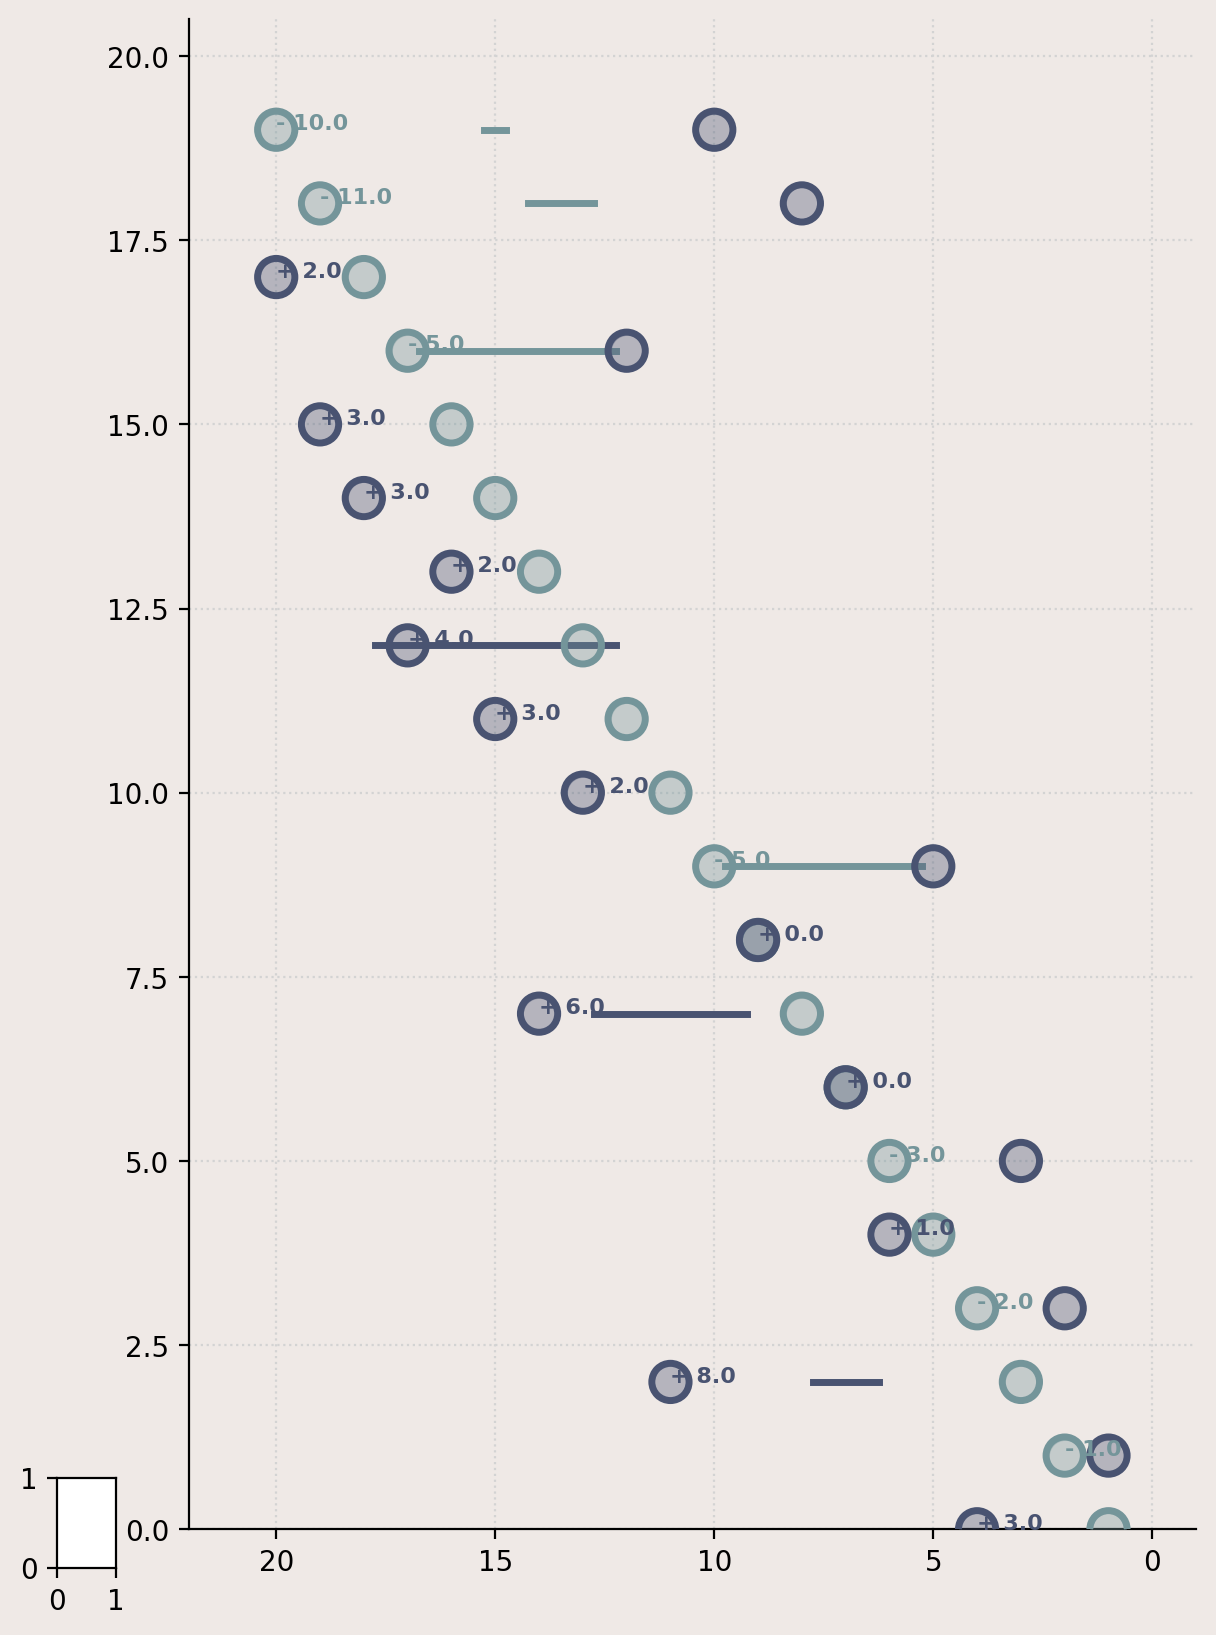

In [26]:
#%%
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as ticker
from matplotlib import rcParams
import numpy as np
from highlight_text import fig_text
import pandas as pd

from PIL import Image
import urllib
import os

wage_vs_rating = wage_vs_rating.sort_values(by=['new_pound_value_rank'])


fig = plt.figure(figsize=(6.5, 10), dpi = 200, facecolor="#EFE9E6")
ax = plt.subplot(111, facecolor = "#EFE9E6")

# Adjust spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.grid(True, color = "lightgrey", ls = ":")



# Define the series
teams = list(wage_vs_rating["team_id"].unique())
Y = np.arange(len(teams))
X_wage = wage_vs_rating["new_pound_value_rank"]
X_rating = wage_vs_rating["ratings_rank"]

# Fix axes limits
ax.set_ylim(0, len(teams) + 0.5)
ax.set_xlim(
    max(X_wage.max(), X_rating.max()) + 2, # Add 1 to provide some margin on the right
    min(X_wage.min(), X_rating.min()) - 2  # Subtract 1 to provide some margin on the left
       
)

# Scatter plots
ax.scatter(X_wage, Y, color = "#74959A", s = 150, alpha = 0.35, zorder = 3)
ax.scatter(X_rating, Y, color = "#495371", s = 150, alpha = 0.35, zorder = 3)
ax.scatter(X_wage, Y, color = "none", ec = "#74959A", s = 180, lw = 2.5, zorder = 3)
ax.scatter(X_rating, Y, color = "none", ec = "#495371", s = 180, lw = 2.5, zorder = 3)


# Add line chart between points and difference annotation
for index in Y:
    difference = X_wage.iloc[index] - X_rating.iloc[index]
    if difference > 0:
        color = "#74959A" 
        x_adj = -4.75
        anot_position = X_wage.iloc[index]
        anot_aux_sign = "-"
    else:
        color = "#495371"
        x_adj = 4.75
        anot_position = X_rating.iloc[index]
        anot_aux_sign = "+"
    
    ax.annotate(
        xy = (anot_position, index),
        text = f"{anot_aux_sign} {abs(difference):.1f}",
        xytext = (0, 0),  # Update this line
        textcoords = "offset points",
        size = 8,
        color = color,
        weight = "bold"
)
    
    if abs(difference) < 3.5:
        continue
    ax.plot(
        [X_wage.iloc[index] + x_adj, X_rating.iloc[index] + x_adj*(-1)],
        [index, index],
        lw = 2.5,
        color = color,
        zorder = 2
    )

# Native data to figure coordinates
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

# Define logo size and position relative to the chart
logo_size = 0.045
logo_x_offset = 0.025
logo_y_offset = 0.02

for index, team_id in enumerate(teams):
    # ax_coords = DC_to_NFC([max(X_wage.max(), X_rating.max()) + logo_x_offset, index + 0.5 - logo_y_offset])
    ax_coords = DC_to_NFC([25, index - 0.52])

    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], logo_size, logo_size], anchor="C")
    club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id:.0f}.png")).convert("LA")
    logo_ax.imshow(club_icon)
    logo_ax.axis("off")


# Remove tick labels
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
false_ticks = ax.set_yticklabels([])

fig_text(
    x = 0.15, y = .9, 
    s = "During the 22/23 season which Premier League \nside <Performance Rating> relative their <wage bill>",
    highlight_textprops = [
        {"color": "#495371"},
        {"color":"#74959A"}
    ],
    va = "bottom", ha = "left",
    fontsize = 14, color = "black", font = "DM Sans", weight = "bold"
)
fig_text(
	x = 0.15, y = .885, 
    s = "English Premier Legaue | 2022 - 2023 season | viz by @stephenaq7",
	va = "bottom", ha = "left",
	fontsize = 8, color = "#4E616C", font = "Karla"
)

# # ---- The League's logo
league_icon = Image.open(urllib.request.urlopen(f"https://images.fotmob.com/image_resources/logo/leaguelogo/47.png"))
league_ax = fig.add_axes([0.055, 0.89, 0.065, 0.065], zorder=1)
league_ax.imshow(league_icon)
league_ax.axis("off")



In [42]:
wage_dist = pd.merge(merged_df, team_names, on='team_id')
wage_dist

,Unnamed: 0_x,Name,Nation,Pos,Age,new_pound_value,URL,ratings,team_id,Unnamed: 0_y,team,xg_diff,xg_for,xg_against
0,0,Cristian Romero,pt POR,FW,37.0,515000,https://www.fotmob.com/players/789066/cristian...,7.01,8586,14,Tottenham,1.4,4.1,2.8
1,0,Harry Kane,eng ENG,FW,29.0,200000,https://www.fotmob.com/players/194165/harry-kane,7.64,8586,14,Tottenham,1.4,4.1,2.8
2,1,Heung-Min Son,kr KOR,"MF,FW",30.0,190000,https://www.fotmob.com/players/212867/heung-mi...,7.16,8586,14,Tottenham,1.4,4.1,2.8
3,2,Ivan Perisic,hr CRO,"DF,MF",33.0,180000,https://www.fotmob.com/players/163670/ivan-per...,7.01,8586,14,Tottenham,1.4,4.1,2.8
4,3,Cristian Romero,ar ARG,DF,24.0,165000,https://www.fotmob.com/players/789066/cristian...,7.01,8586,14,Tottenham,1.4,4.1,2.8
5,4,Clément Lenglet,fr FRA,DF,27.0,145000,https://www.fotmob.com/players/488412/clment-l...,6.80,8586,14,Tottenham,1.4,4.1,2.8
6,5,Dejan Kulusevski,se SWE,"MF,DF",22.0,110000,https://www.fotmob.com/players/935379/dejan-ku...,7.10,8586,14,Tottenham,1.4,4.1,2.8
7,6,Pierre-Emile Højbjerg,dk DEN,MF,26.0,100000,https://www.fotmob.com/players/266523/pierre-e...,7.50,8586,14,Tottenham,1.4,4.1,2.8
8,7,Hugo Lloris,fr FRA,GK,35.0,100000,https://www.fotmob.com/players/26295/hugo-lloris,6.62,8586,14,Tottenham,1.4,4.1,2.8
9,8,Lucas Moura,br BRA,"FW,MF",29.0,90000,https://www.fotmob.com/players/215299/lucas-moura,6.35,8586,14,Tottenham,1.4,4.1,2.8


In [47]:
cols = ["Name", "Age", "new_pound_value", "team_id", "team"]
wage_dist = wage_dist[cols]


In [43]:
def get_duplicate_rows(df):
    duplicate_mask = df.duplicated(subset="Name", keep=False)
    duplicate_df = df[duplicate_mask]
    return duplicate_df

get_duplicate_rows(wage_dist)

,Unnamed: 0_x,Name,Nation,Pos,Age,new_pound_value,URL,ratings,team_id,Unnamed: 0_y,team,xg_diff,xg_for,xg_against
0,0,Cristian Romero,pt POR,FW,37.0,515000,https://www.fotmob.com/players/789066/cristian...,7.01,8586,14,Tottenham,1.4,4.1,2.8
4,3,Cristian Romero,ar ARG,DF,24.0,165000,https://www.fotmob.com/players/789066/cristian...,7.01,8586,14,Tottenham,1.4,4.1,2.8
27,7,Antony,br BRA,FW,22.0,200000,https://www.fotmob.com/players/967622/antony,7.21,10260,6,Manchester Utd,-0.7,4.1,4.9
32,12,Fred,br BRA,MF,29.0,120000,https://www.fotmob.com/players/322049/fred,6.81,10260,6,Manchester Utd,-0.7,4.1,4.9
43,24,Diogo Dalot,pt POR,DF,23.0,25000,https://www.fotmob.com/players/751550/diogo-dalot,7.32,10260,6,Manchester Utd,-0.7,4.1,4.9
47,10,Diogo Dalot,es ESP,DF,28.0,45000,https://www.fotmob.com/players/751550/diogo-dalot,7.32,10260,6,Manchester Utd,-0.7,4.1,4.9
49,20,Antony,fr FRA,MF,27.0,45000,https://www.fotmob.com/players/967622/antony,7.21,10260,6,Manchester Utd,-0.7,4.1,4.9
50,21,Fred,fr FRA,RB,27.0,40000,https://www.fotmob.com/players/322049/fred,6.81,10260,6,Manchester Utd,-0.7,4.1,4.9
85,5,Ricardo Pereira,pt POR,"DF,MF",28.0,80000,https://www.fotmob.com/players/306128/ricardo-...,7.04,8197,2,Leicester City,-2.3,1.5,3.7
94,14,Ricardo Pereira,es ESP,"MF,FW",29.0,45000,https://www.fotmob.com/players/306128/ricardo-...,7.04,8197,2,Leicester City,-2.3,1.5,3.7


In [41]:
def remove_duplicates(df):
    df.drop_duplicates(subset=["Name"], keep="last", inplace=True)
    return df

wage_dist = remove_duplicates(wage_dist)
wage_dist

,Name,Age,new_pound_value,team_id,team
0,Cristian Romero,37.0,515000,8586,Tottenham
1,Harry Kane,29.0,200000,8586,Tottenham
2,Heung-Min Son,30.0,190000,8586,Tottenham
3,Ivan Perisic,33.0,180000,8586,Tottenham
5,Clément Lenglet,27.0,145000,8586,Tottenham
6,Dejan Kulusevski,22.0,110000,8586,Tottenham
7,Pierre-Emile Højbjerg,26.0,100000,8586,Tottenham
8,Hugo Lloris,35.0,100000,8586,Tottenham
9,Lucas Moura,29.0,90000,8586,Tottenham
10,Richarlison,25.0,90000,8586,Tottenham


In [89]:
def create_wage_bins(df):
    bin_labels = ["<£10k", "£10k-£50k", "£50k-£80k", "£80k-£100k", "£100k-£150k", "£150k-£200k", "£300k+"]
    bin_edges = [0, 10000, 50000, 80000, 100000, 150000, 200000, 500000]
    
    df["Wage_Bin"] = pd.cut(df["new_pound_value"], bins=bin_edges, labels=bin_labels, include_lowest=True)
    df.dropna(subset=["Wage_Bin"], inplace=True)
    bin_counts = df.groupby("Wage_Bin")["team"].nunique()
    df["Count"] = df["Wage_Bin"].map(bin_counts)
    return df

wages_viz = create_wage_bins(wage_dist)


In [121]:
wages_viz.to_csv("wage_viz.csv")

In [91]:
aggregated_df = wages_viz.groupby(['team', 'team_id', 'Wage_Bin']).size().reset_index(name='Count')
aggregated_df


,team,team_id,Wage_Bin,Count
0,Arsenal,9825,£10k-£50k,10
1,Arsenal,9825,£50k-£80k,5
2,Arsenal,9825,£80k-£100k,2
3,Arsenal,9825,£100k-£150k,6
4,Arsenal,9825,£150k-£200k,1
5,Arsenal,9825,£300k+,1
6,Aston Villa,10252,£10k-£50k,13
7,Aston Villa,10252,£50k-£80k,7
8,Aston Villa,10252,£80k-£100k,3
9,Aston Villa,10252,£100k-£150k,3


In [92]:
grouped_df

In [93]:
team_list = list(wages_viz.team_id.unique())

In [94]:
colors = ['#206890', '#375196', '#69A8D8', '#302028', '#D8394C', '#085098', '#005898', '#a00028', '#005090', '#007838', '#0C2044', '#18B8E8', '#FF6600', '#FF3399', '#00CC99', '#9900FF', '#FF00CC', '#66FF33', '#FFCC00', '#3399FF']

color_dict = dict(zip(team_list,colors))

In [95]:
aggregated_df["teamColor"] = aggregated_df['team_id'].map(color_dict)

In [96]:
aggregated_df

,team,team_id,Wage_Bin,Count,teamColor
0,Arsenal,9825,£10k-£50k,10,#00CC99
1,Arsenal,9825,£50k-£80k,5,#00CC99
2,Arsenal,9825,£80k-£100k,2,#00CC99
3,Arsenal,9825,£100k-£150k,6,#00CC99
4,Arsenal,9825,£150k-£200k,1,#00CC99
5,Arsenal,9825,£300k+,1,#00CC99
6,Aston Villa,10252,£10k-£50k,13,#a00028
7,Aston Villa,10252,£50k-£80k,7,#a00028
8,Aston Villa,10252,£80k-£100k,3,#a00028
9,Aston Villa,10252,£100k-£150k,3,#a00028


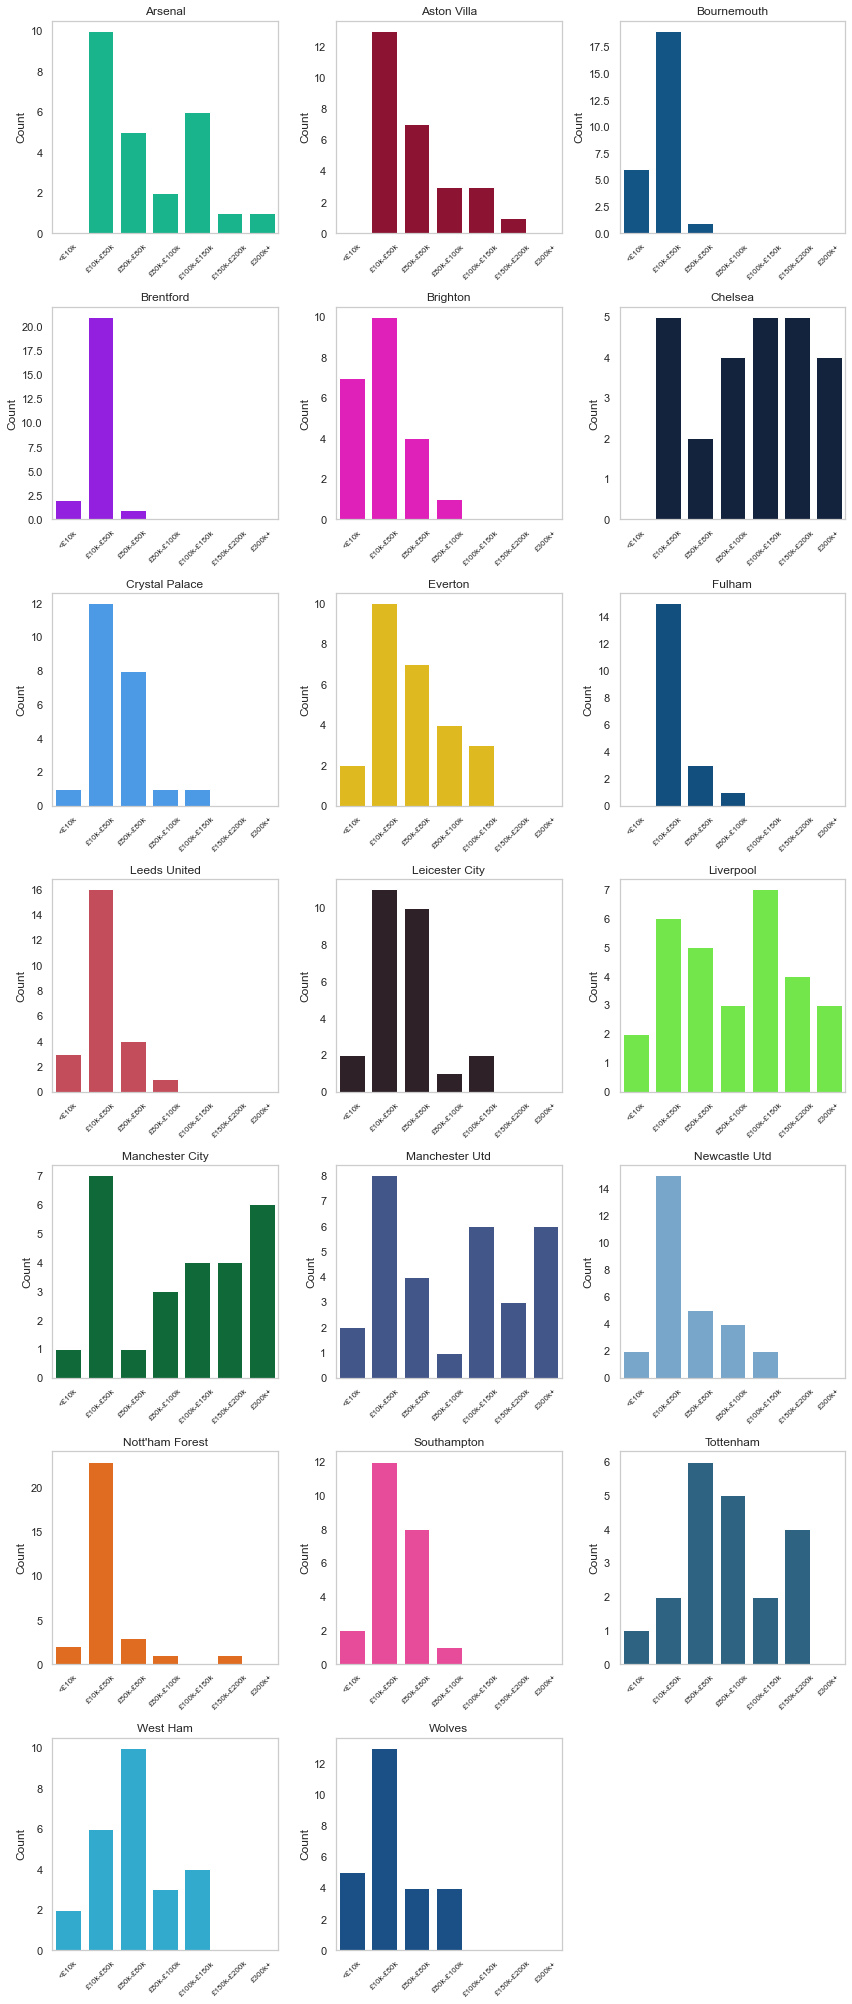

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt


df = aggregated_df
# Set the plot style
sns.set(style='whitegrid')

# Create a unique list of team IDs
team_ids = df['team_id'].unique()

# Calculate the number of rows and columns for the subplot grid
num_rows = int(np.ceil(len(team_ids) / 3))
num_cols = min(len(team_ids), 3)

# Create the grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))
axes = axes.flatten()

# Iterate over each unique team ID and plot the bar chart
for i, team_id in enumerate(team_ids):
    team_df = df[df['team_id'] == team_id]
    team_name = team_df['team'].iloc[0]
    team_color = team_df['teamColor'].iloc[0]
    
    ax = axes[i]
    sns.barplot(data=team_df, x='Wage_Bin', y='Count', ax=ax, color=team_color)
    ax.set_title(team_name)
    ax.set_xlabel('')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45, labelsize=8)  # Adjust label size
    ax.grid(axis='y')
    
    # Align x-axis labels with bars
    ax.set_xticklabels(ax.get_xticklabels(), ha='center')

# Hide unused subplots
if len(team_ids) < len(axes):
    for j in range(len(team_ids), len(axes)):
        axes[j].axis('off')


# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

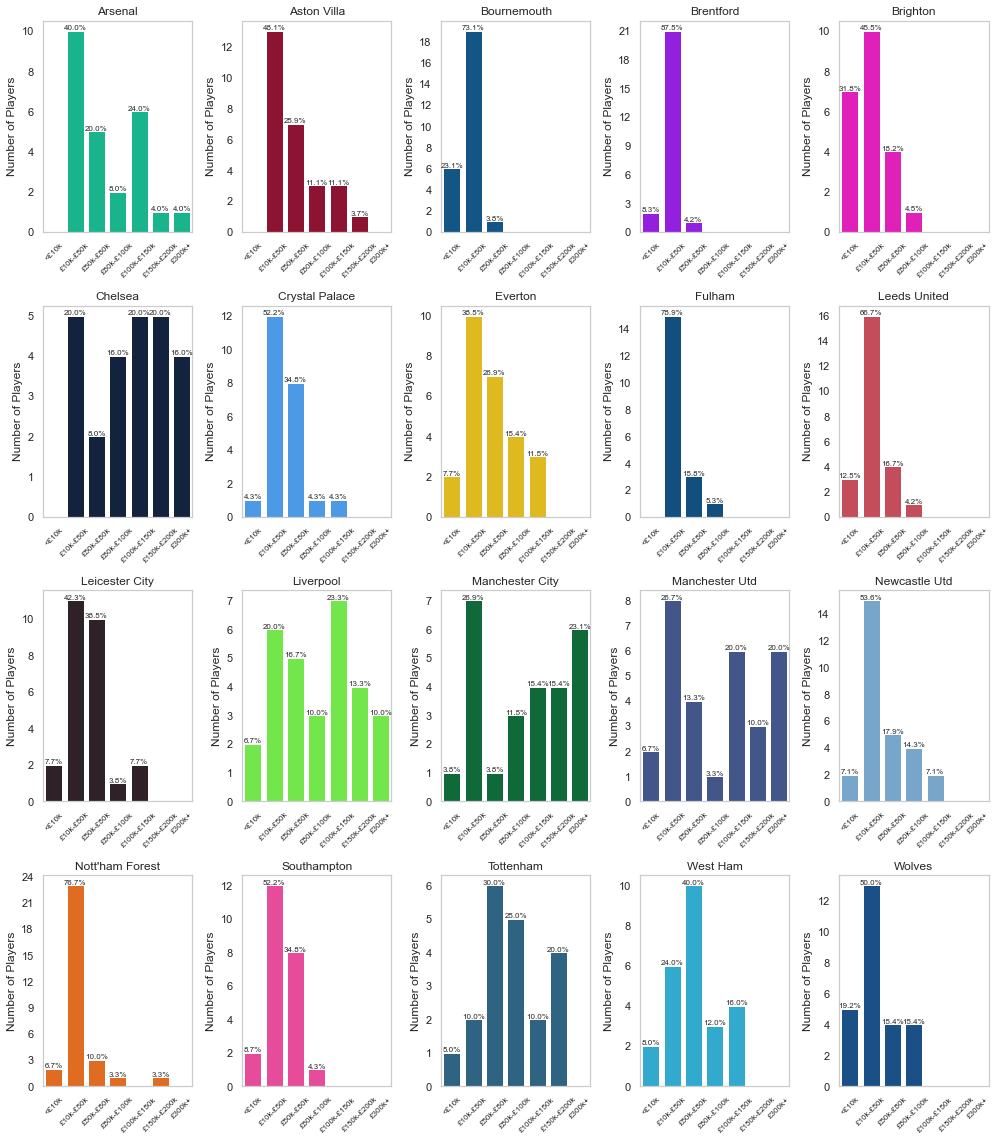

In [117]:
import matplotlib.style as style

style.use('fivethirtyeight')
# Set the plot style
# Set the plot style
sns.set(style='whitegrid')

# Create a unique list of team IDs
team_ids = df['team_id'].unique()

# Calculate the number of rows and columns for the subplot grid
num_rows = 4
num_cols = 5

# Create the grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 4 * num_rows))
axes = axes.flatten()

# Iterate over each unique team ID and plot the bar chart
for i, team_id in enumerate(team_ids):
    team_df = df[df['team_id'] == team_id]
    team_name = team_df['team'].iloc[0]
    team_color = team_df['teamColor'].iloc[0]

    ax = axes[i]
    sns.barplot(data=team_df, x='Wage_Bin', y='Count', ax=ax, color=team_color)
    ax.set_title(team_name)
    ax.set_xlabel('')
    ax.set_ylabel('Number of Players')
    ax.tick_params(axis='x', rotation=45, labelsize=8)  # Adjust label size
    ax.grid(axis='y')
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    logo_ax = plt.subplot(
        gspec[row,col],
    anchor = 'NW', facecolor = '#EFE9E6')
club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{teamId:.0f}.png')).convert('LA')
logo_ax.imshow(club_icon)
logo_ax.axis('off')

    # Align x-axis labels with bars
    ax.set_xticklabels(ax.get_xticklabels(), ha='center')

    # Add percentage labels on top of the bars
    total_count = team_df['Count'].sum()
    for p in ax.patches:
        height = p.get_height()
        percentage = f"{(height / total_count) * 100:.1f}%"
        ax.text(p.get_x() + p.get_width() / 2, height, percentage, ha='center', va='bottom', fontsize=8)

    # Format y-axis tick labels as whole integers
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Hide unused subplots
if len(team_ids) < len(axes):
    for j in range(len(team_ids), len(axes)):
        axes[j].axis('off')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

TypeError: invalid type comparison

In [120]:
df

,team,team_id,Wage_Bin,Count,teamColor,Percentage
0,Arsenal,9825,£10k-£50k,10,#00CC99,40.000000
1,Arsenal,9825,£50k-£80k,5,#00CC99,20.000000
2,Arsenal,9825,£80k-£100k,2,#00CC99,8.000000
3,Arsenal,9825,£100k-£150k,6,#00CC99,24.000000
4,Arsenal,9825,£150k-£200k,1,#00CC99,4.000000
5,Arsenal,9825,£300k+,1,#00CC99,4.000000
6,Aston Villa,10252,£10k-£50k,13,#a00028,48.148148
7,Aston Villa,10252,£50k-£80k,7,#a00028,25.925926
8,Aston Villa,10252,£80k-£100k,3,#a00028,11.111111
9,Aston Villa,10252,£100k-£150k,3,#a00028,11.111111


In [ ]:
df[df['team_id'] == team_id]